#**Graded Challenge 4 Phase 1**
## **Credit Card Customer Segmentation**

Nadia Oktiarsy, FSDS Batch-016 RMT (Buddy: Dian)

---
```
Table of Contents:
1. Introduction
2. Importing Libraries
3. Data Loading
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing
6. Model Definition
7. Model Training
8. Model Evalutation
9. Model Inference
10. Conclusion
```

## **1. Introduction**

Customers behaviour is necessary to be analyzed in order to improve the performance of a business. It enables a business to provide solutions for customers needs as products or services, and the business can be various since innovations of business will keep growing as the competition is also tighter.

Not only the growing number of competition of business that keeps growing, the development of technology and information will create the situation of customers behaviour will grow in any modern business. The leverage of the data to maximize decision is important to do for a big business, such as banks, to make an effective business and marketing strategy in the future.

This case also happens in bank by selling their products and services such as credit cards. A credit card is a type of credit facility, provided by banks that allow customers to borrow funds within a pre-approved credit limit. It enables customers to make purchase transactions on goods and services.

### **Problem Statements**

Thus, the activity of credit card usage is important to keep the business keep growing and alive. From this analysis, the customers segmentation will be applied as we should understand about credit card customers behaviours. From here, the question raised is: ***what kind of customers that have been actively using credit cards in the last 6 months?***

## **2. Importing Libraries**

In [2]:
# Installing feature-engine
%pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.3 MB/s 


In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
from pandas.core.arrays import numeric
from scipy.stats import norm
from scipy import stats
import sys
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Data visualization libraries
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)
import plotly.express as px

from yellowbrick.cluster import SilhouetteVisualizer

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Outliers Handling Winsorizer
from feature_engine.outliers import Winsorizer

# Split Dataset and Standarize the Datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline

# Unsupervised Evaluation
from sklearn.metrics import silhouette_score

# Import Dimension Reduction
from sklearn.decomposition import PCA

# Import Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# GoogleCloud Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

# Save and Load Model
import joblib
import json

project = 'hacktiv8-016-nadiaoktiarsy' # Project ID inserted based on the query results selected to explore
location = 'US'                        # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
auth.authenticate_user()

## **3. Data Loading**

The data taken for the analysis is about credit card information with 4474 active credit card holders and 17 holder's behaviors.

In [4]:
# Creating query
df = client.query('''
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_016_rmt.credit-card-information`
WHERE mod(CUST_ID,2) = 0
ORDER BY CUST_ID
''').to_dataframe()

df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        2  4613.570499                1.0       0.00              0.00   
1        4  2583.247881                1.0    1337.35             45.65   
2        6  1597.911395                1.0       0.00              0.00   
3        8  3506.489102                1.0       0.00              0.00   
4       10  2306.310095                1.0     359.96              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00   1728.341939             0.000000   
1                 1291.70   2484.594650             1.000000   
2                    0.00    162.919727             0.000000   
3                    0.00   4467.382055             0.000000   
4                  359.96   2843.482435             0.916667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.000000   
1                    0.083333                          1.000000   
2                    0.000000                          0.000000   
3                    0.000000                          0.000000   
4                    0.000000                          0.916667   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.090909                 1              0        6000.0   
1                0.500000                18             21        3000.0   
2                0.250000                 3              0        1800.0   
3                1.000000                11              0        5000.0   
4                0.333333                 6             11        4000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   922.218961       1460.635220               0.0      11  
1   819.792196       6404.855484               0.0      12  
2   548.420841        416.956325               0.0      12  
3   286.708354        628.484562               0.0       6  
4  1482.816136       2056.434829               0.0      12

In [5]:
df.tail()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4470     8942    83.477053           0.181818       0.00               0.0   
4471     8944     8.404256           0.857143       0.00               0.0   
4472     8946  4211.539631           1.000000       0.00               0.0   
4473     8948   111.539712           1.000000    1364.86               0.0   
4474     8950   294.280019           1.000000      19.90              19.9   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4470                    0.00   2654.856157             0.000000   
4471                    0.00    132.266653             0.000000   
4472                    0.00    455.581546             0.000000   
4473                 1364.86      0.000000             0.916667   
4474                    0.00     75.255164             0.083333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.833333   
4474                    0.083333                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4470                0.083333                 2              0        3000.0   
4471                0.285714                 3              0        2500.0   
4472                0.083333                 1              0       10500.0   
4473                0.000000                 0             11        4000.0   
4474                0.166667                 2              1        1000.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4470  12902.188130       1791.729021              0.50      12  
4471    206.851966         24.421074              0.25       7  
4472   1288.287239       1164.178674              0.00      12  
4473   1500.447193        150.868096              0.20      12  
4474    214.638861        174.577973              0.00      12

In [6]:
## Downloading csv file
# from google.colab import files
# df.to_csv(r'h8dsft_P1G4_nadia_oktiarsy.csv')
# files.download(r'h8dsft_P1G4_nadia_oktiarsy.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   Int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   Int64  
 12  PURCHA

In [8]:
# Converting pay_5 and pay_6 from string to float
df = df.astype({'CUST_ID': 'object','CASH_ADVANCE_TRX':'float','PURCHASES_TRX':'float','TENURE':'float'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   object 
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   float64
 12  PURCHA

In [9]:
# Checking missing values
print('Total Missing Values:', df.isnull().sum().sum(), '\n')

# Checking missing values
df.isnull().sum()

Total Missing Values: 159 



CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 159 missing values, then we should check where the missing values are.

**Data description**

Header | Definition
---|---
`CUST_ID` | Identification of Credit Card holder (Categorical)
`BALANCE` | Balance amount left in their account to make purchases
`BALANCE_FREQUENCY  ` | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
`PURCHASES` | Amount of purchases made from account
`ONEOFF_PURCHASES` | Maximum purchase amount done in one-go
`INSTALLMENTS_PURCHASES` | Amount of purchase done in installment
`CASH_ADVANCE` | Cash in advance given by the user
`PURCHASES_FREQUENCY` | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
`ONEOFF_PURCHASES_FREQUENCY` | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
`PURCHASES_INSTALLMENTS_FREQUENCY` | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
`CASH_ADVANCE_FREQUENCY` | How frequently the cash in advance being paid
`CASH_ADVANCE_TRX` | Number of Transactions made with "Cash in Advanced"
`PURCHASES_TRX` | Number of purchase transactions made
`CREDIT_LIMIT` | Limit of Credit Card for user
`PAYMENTS` | Amount of Payment done by user
`MINIMUM_PAYMENTS` | Minimum amount of payments made by user
`PRC_FULL_PAYMENT` | Percent of full payment paid by user
`TENURE` | Tenure of credit card service for user

## **4. Exploratory Data Analysis (EDA)**


### **4.1. Central Tendency**

In [10]:
# General statistic information
df.describe().T

count         mean          std  \
BALANCE                           4475.0  1565.743939  2091.205727   
BALANCE_FREQUENCY                 4475.0     0.877608     0.235604   
PURCHASES                         4475.0  1003.158324  2210.812899   
ONEOFF_PURCHASES                  4475.0   588.504849  1666.500287   
INSTALLMENTS_PURCHASES            4475.0   415.025075   927.360842   
CASH_ADVANCE                      4475.0   973.453671  2133.464502   
PURCHASES_FREQUENCY               4475.0     0.490122     0.399874   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202614     0.298502   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.364989     0.397336   
CASH_ADVANCE_FREQUENCY            4475.0     0.134156     0.199221   
CASH_ADVANCE_TRX                  4475.0     3.196425     6.500169   
PURCHASES_TRX                     4475.0    14.490503    24.156038   
CREDIT_LIMIT                      4474.0  4494.020175  3668.535689   
PAYMENTS                          4475.0  1726.212274  2961.258570   
MINIMUM_PAYMENTS                  4317.0   854.429538  2306.411178   
PRC_FULL_PAYMENT                  4475.0     0.157206     0.295869   
TENURE                            4475.0    11.516425     1.347819   

                                         min          25%          50%  \
BALANCE                             0.000000   132.536353   874.905296   
BALANCE_FREQUENCY                   0.000000     0.888889     1.000000   
PURCHASES                           0.000000    40.065000   362.480000   
ONEOFF_PURCHASES                    0.000000     0.000000    29.990000   
INSTALLMENTS_PURCHASES              0.000000     0.000000    89.450000   
CASH_ADVANCE                        0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                 0.000000     0.083333     0.500000   
ONEOFF_PURCHASES_FREQUENCY          0.000000     0.000000     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000     0.000000     0.166667   
CASH_ADVANCE_FREQUENCY              0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                    0.000000     0.000000     0.000000   
PURCHASES_TRX                       0.000000     1.000000     7.000000   
CREDIT_LIMIT                      150.000000  1500.000000  3000.000000   
PAYMENTS                            0.000000   390.206371   831.048408   
MINIMUM_PAYMENTS                    0.037744   169.814310   309.854995   
PRC_FULL_PAYMENT                    0.000000     0.000000     0.000000   
TENURE                              6.000000    12.000000    12.000000   

                                          75%           max  
BALANCE                           2058.519163  19043.138560  
BALANCE_FREQUENCY                    1.000000      1.000000  
PURCHASES                         1122.640000  49039.570000  
ONEOFF_PURCHASES                   580.320000  40761.250000  
INSTALLMENTS_PURCHASES             484.255000  22500.000000  
CASH_ADVANCE                      1098.569962  29282.109150  
PURCHASES_FREQUENCY                  0.916667      1.000000  
ONEOFF_PURCHASES_FREQUENCY           0.333333      1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.750000      1.000000  
CASH_ADVANCE_FREQUENCY               0.181818      1.166667  
CASH_ADVANCE_TRX                     4.000000    110.000000  
PURCHASES_TRX                       17.000000    358.000000  
CREDIT_LIMIT                      6000.000000  30000.000000  
PAYMENTS                          1895.959003  46930.598240  
MINIMUM_PAYMENTS                   830.395060  61031.618600  
PRC_FULL_PAYMENT                     0.166667      1.000000  
TENURE                              12.000000     12.000000

**Balance vs Purchase**

The scatter plots show the balance left and purchases are stacking at the bottom left of the axes. These plot can be observed the Balance relations with other variables. Apparently one plot shows slightly different than the others, which is Balance-Cash Advance and its distribution looks less stacked than others.

Text(0.5, 1.0, 'Scatter Plot: Balance - Cash Advance')

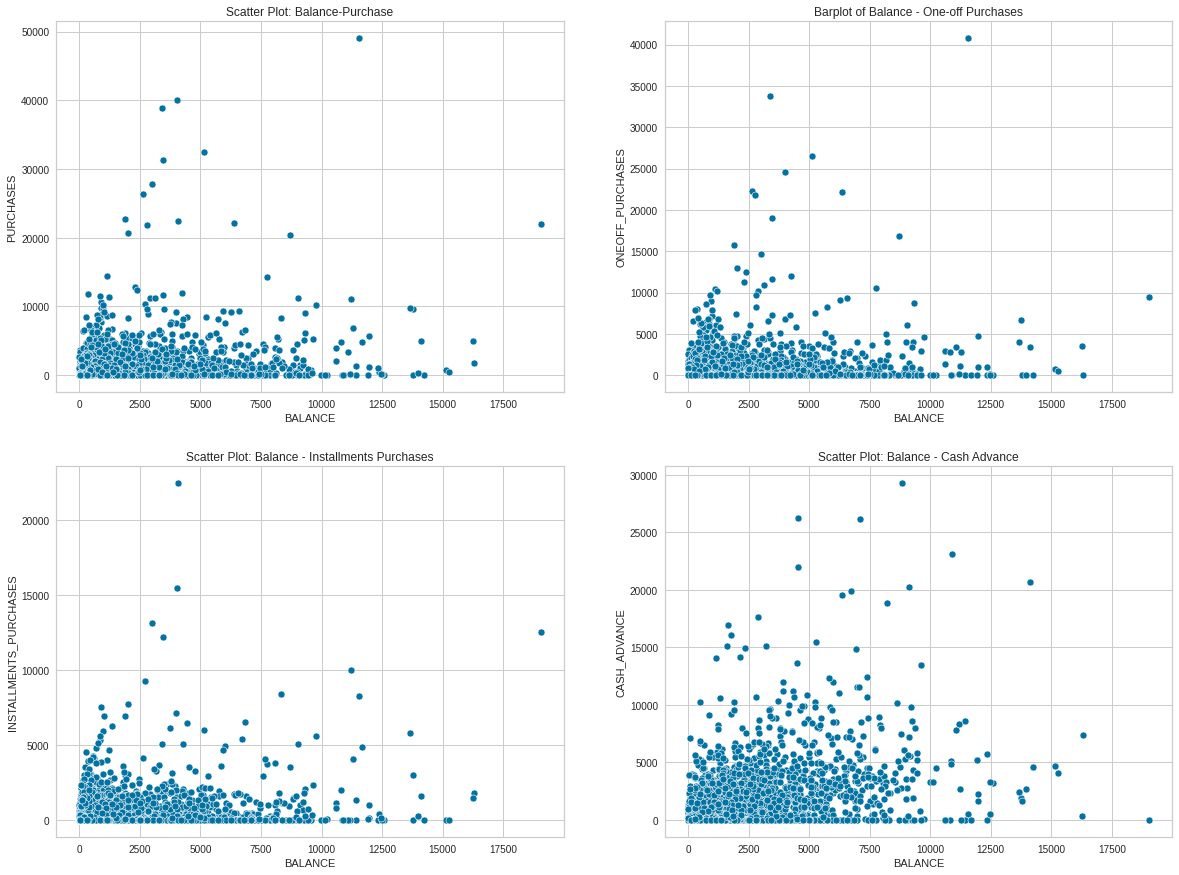

In [11]:
# Scatter plot Balance and Purchases
matplotlib.rcParams['figure.figsize'] = (20,15)
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x="BALANCE", y="PURCHASES")
plt.title('Scatter Plot: Balance-Purchase')

# Scatter plot Balance and One-Off Purchases
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x="BALANCE", y="ONEOFF_PURCHASES")
plt.title('Barplot of Balance - One-off Purchases')

# Scatter plot Balance and Installments Purchases
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x="BALANCE", y="INSTALLMENTS_PURCHASES")
plt.title('Scatter Plot: Balance - Installments Purchases')

# Scatter plot Balance and Cash Advance
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x="BALANCE", y="CASH_ADVANCE")
plt.title('Scatter Plot: Balance - Cash Advance')

**Tenure**

Tenure is basically about how long customers have been actively using the credit card for the last six month. We can see that apparently more people already reach 12 months as the credit card customers.

In [12]:
# Number of Death Event
df.TENURE.value_counts()

12.0    3807
11.0     166
10.0     114
6.0      103
7.0      100
8.0       97
9.0       88
Name: TENURE, dtype: int64

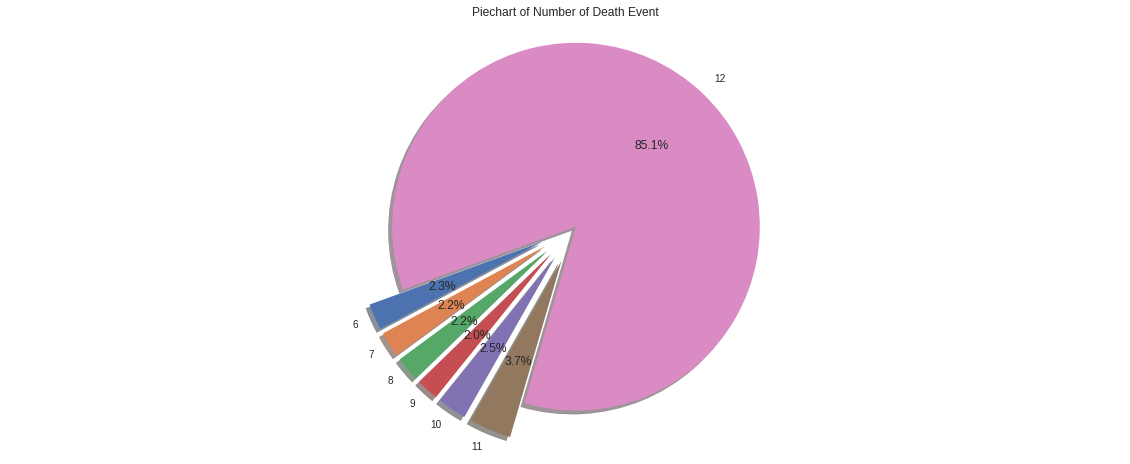

In [13]:
matplotlib.rcParams['figure.figsize'] = (20,8)

# Creating Plot piechart of Cab Type (Uber vs Lyft)
tenure_pie = dict(df.TENURE.value_counts())
labels = '6', '7', '8', '9', '10', '11', '12'
sizes = [tenure_pie[6], tenure_pie[7], tenure_pie[8], tenure_pie[9], tenure_pie[10], tenure_pie[11], tenure_pie[12]]
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0)

with sns.color_palette("deep"):
    plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=200)

# Plot title
plt.axis('equal')
plt.title('Piechart of Number of Death Event')
plt.show()

**Histogram**

The histograms show that most of data available are skewed right. this skewness later will be checked in Data Preprocessing part. However, it is important to know the skewness of the data since it will influence the extreme values and segmentation analysis is sensitive with the outliers.

Text(0.5, 1.0, 'Cash Advance Frequency')

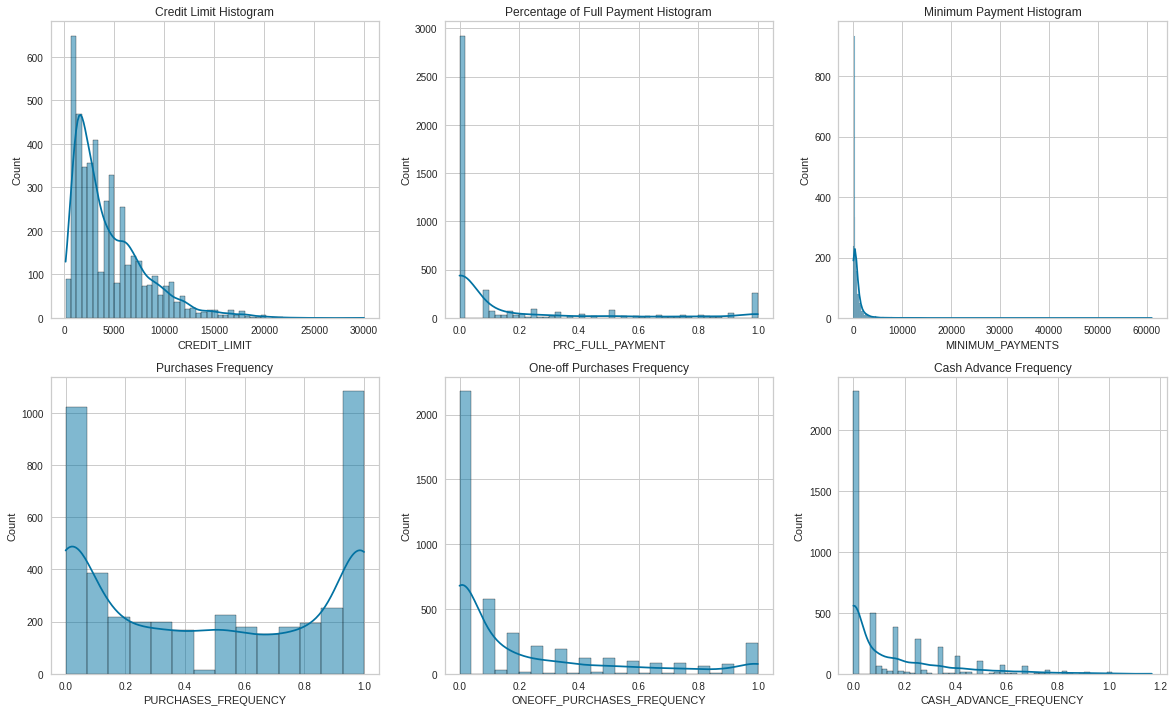

In [14]:
# Scatter plot Balance and Purchases
matplotlib.rcParams['figure.figsize'] = (20,12)
plt.subplot(2, 3, 1)
sns.histplot(df.CREDIT_LIMIT, kde=True)
plt.title('Credit Limit Histogram')

# Scatter plot Balance and Purchases
plt.subplot(2, 3, 2)
sns.histplot(df.PRC_FULL_PAYMENT, kde=True)
plt.title('Percentage of Full Payment Histogram')

# Scatter plot Balance and Purchases
plt.subplot(2, 3, 3)
sns.histplot(df.MINIMUM_PAYMENTS, kde=True)
plt.title('Minimum Payment Histogram')

# Scatter plot Balance and Purchases
plt.subplot(2, 3, 4)
sns.histplot(df.PURCHASES_FREQUENCY, kde=True)
plt.title('Purchases Frequency')

# Scatter plot Balance and Purchases
plt.subplot(2, 3, 5)
sns.histplot(df.ONEOFF_PURCHASES_FREQUENCY, kde=True)
plt.title('One-off Purchases Frequency')

# Scatter plot Balance and Purchases
plt.subplot(2, 3, 6)
sns.histplot(df.CASH_ADVANCE_FREQUENCY, kde=True)
plt.title('Cash Advance Frequency')

### **4.2. Correlation Analysis**

To sum up based on the correlation matrix analysis, apparently `PURCHASES` needs some connections with other variables, such as `ONE-OFF PURCHASES` AND `INSTALLMENTS_PURCHASES` with results strong correlations. Some of variables have either weak or no correlations.

This means the observation should be taken more. **The more correlated these variables the more chance to have overlapped between clusters later**, which we should avoid in clustering analysis. Moreover, we should find out how to handle these variables are less correlated to each other.

Further analysis to find out variable correlations such as:
- **Detecting Multicollinearity using Variance Inflation Factors (VIF)**

In [15]:
# Making feature scaling for numerical columns with Normalizaation - MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)

df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns, index = df.index)

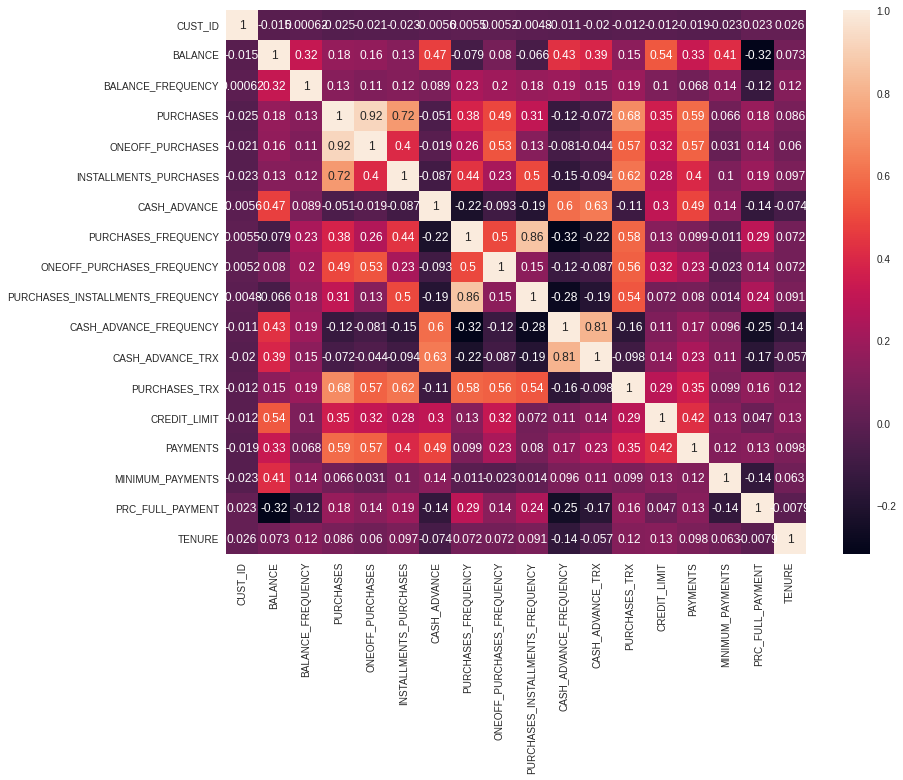

In [16]:
# Plotting Correlation Matrix of Categorical columns and Price
plt.figure(figsize=(13,10))
sns.heatmap(df_scaled.corr(),annot=True)

## **5. Data Preprocessing**

In data preprocessing, there are some steps that will be taken:
1. Droppping CUST_ID because the value can interfere the overall result.
2. Checking missing values: drop a missing value from `CREDIT_LIMIT` because there is only one missing value, and subtitute missing values from `MININUM_PAYMENTS` with median because of the overall skewness of the data which is Right Skewed.
3. Creating data inference.
4. Handling outliers, which is important because clustering algorithms are sensitive to outliers.
5. Detecting Multicollinearity: choose the right method to handle multicollinearity.
6. Creating Dimensionality Reduction: use **Principal Component Analysis (PCA) in response of multicollinearity**.

In [17]:
#use CustomerID as index
df = df.set_index('CUST_ID')

### **5.1. Missing Values**

As mentioned above, the `MINIMUM_PAYMENTS` has 158 missing values, which is better to subtitute it with **median** because of its skewness as Right Skewed.

In [18]:
# Dropping one missing value from CREDIT_LIMIT
df.dropna(subset = ['CREDIT_LIMIT'], inplace = True)

In [19]:
# Replacing NaN for one column using pandas:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
2        4613.570499           1.000000       0.00              0.00   
4        2583.247881           1.000000    1337.35             45.65   
6        1597.911395           1.000000       0.00              0.00   
8        3506.489102           1.000000       0.00              0.00   
10       2306.310095           1.000000     359.96              0.00   
...              ...                ...        ...               ...   
8942       83.477053           0.181818       0.00              0.00   
8944        8.404256           0.857143       0.00              0.00   
8946     4211.539631           1.000000       0.00              0.00   
8948      111.539712           1.000000    1364.86              0.00   
8950      294.280019           1.000000      19.90             19.90   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
2                          0.00   1728.341939             0.000000   
4                       1291.70   2484.594650             1.000000   
6                          0.00    162.919727             0.000000   
8                          0.00   4467.382055             0.000000   
10                       359.96   2843.482435             0.916667   
...                         ...           ...                  ...   
8942                       0.00   2654.856157             0.000000   
8944                       0.00    132.266653             0.000000   
8946                       0.00    455.581546             0.000000   
8948                    1364.86      0.000000             0.916667   
8950                       0.00     75.255164             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
2                          0.000000                          0.000000   
4                          0.083333                          1.000000   
6                          0.000000                          0.000000   
8                          0.000000                          0.000000   
10                         0.000000                          0.916667   
...                             ...                               ...   
8942                       0.000000                          0.000000   
8944                       0.000000                          0.000000   
8946                       0.000000                          0.000000   
8948                       0.000000                          0.833333   
8950                       0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
2                      0.090909               1.0            0.0   
4                      0.500000              18.0           21.0   
6                      0.250000               3.0            0.0   
8                      1.000000              11.0            0.0   
10                     0.333333               6.0           11.0   
...                         ...               ...            ...   
8942                   0.083333               2.0            0.0   
8944                   0.285714               3.0            0.0   
8946                   0.083333               1.0            0.0   
8948                   0.000000               0.0           11.0   
8950                   0.166667               2.0            1.0   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                   
2              6000.0    922.218961       1460.635220              0.00   
4              3000.0    819.792196       6404.855484              0.00   
6              1800.0    548.4

In [20]:
# Checking missing values
print('Total Missing Values:', df.isnull().sum().sum(), '\n')

# Checking missing values
df.isnull().sum()

Total Missing Values: 0 



BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### **5.2. Data Inference**

In [21]:
# Creating data inference
df_inf = df.sample(10, random_state=32).sort_index()
df_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
492      2783.614341           1.000000    1725.05            700.05   
1662        9.052765           0.272727     172.00            172.00   
3378       33.146065           1.000000     218.76              0.00   
3460      338.310239           1.000000    2855.04           2488.95   
3484      433.436164           1.000000    2552.55            626.51   
6354     2514.895334           1.000000    3172.38           1653.16   
6386     1220.493289           0.363636       0.00              0.00   
6962       24.976709           1.000000     720.60            720.60   
8296     2370.760037           1.000000      94.47              0.00   
8302       30.525356           0.454545     384.95            384.95   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
492                     1025.00   1004.424902             0.916667   
1662                       0.00      0.000000             0.166667   
3378                     218.76      0.000000             1.000000   
3460                     366.09      0.000000             0.750000   
3484                    1926.04      0.000000             1.000000   
6354                    1519.22    656.112456             1.000000   
6386                       0.00   5607.394437             0.000000   
6962                       0.00     18.985087             1.000000   
8296                      94.47      0.000000             0.666667   
8302                       0.00      0.000000             0.333333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
492                        0.333333                          0.750000   
1662                       0.166667                          0.000000   
3378                       0.000000                          1.000000   
3460                       0.250000                          0.583333   
3484                       1.000000                          0.916667   
6354                       0.916667                          0.916667   
6386                       0.000000                          0.000000   
6962                       1.000000                          0.000000   
8296                       0.000000                          0.583333   
8302                       0.333333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
492                    0.416667               5.0           18.0   
1662                   0.000000               0.0            2.0   
3378                   0.000000               0.0           12.0   
3460                   0.000000               0.0           15.0   
3484                   0.000000               0.0           28.0   
6354                   0.166667               2.0           41.0   
6386                   0.250000               3.0            0.0   
6962                   0.083333               1.0           12.0   
8296                   0.000000               0.0           11.0   
8302                   0.000000               0.0            4.0   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
492            5000.0   812.534656        934.885255          0.000000    12.0  
1662           6000.0   179.644191        118.316999          0.000000    12.0  
3378           5000.0   199.280071        155.771045          0.250000    12.0  
3460           6000.0  2801.205072        125.713305          0.375000    12.0  
3484           5000.0  2828.817452        184.724863          0.000000    12.0  
6354           6800.0  2646.255583        692.

In [22]:
# Drop data inference as a new dataframe
df_clean = df.drop(df_inf.index)
df_clean

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
2        4613.570499           1.000000       0.00              0.00   
4        2583.247881           1.000000    1337.35             45.65   
6        1597.911395           1.000000       0.00              0.00   
8        3506.489102           1.000000       0.00              0.00   
10       2306.310095           1.000000     359.96              0.00   
...              ...                ...        ...               ...   
8942       83.477053           0.181818       0.00              0.00   
8944        8.404256           0.857143       0.00              0.00   
8946     4211.539631           1.000000       0.00              0.00   
8948      111.539712           1.000000    1364.86              0.00   
8950      294.280019           1.000000      19.90             19.90   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
2                          0.00   1728.341939             0.000000   
4                       1291.70   2484.594650             1.000000   
6                          0.00    162.919727             0.000000   
8                          0.00   4467.382055             0.000000   
10                       359.96   2843.482435             0.916667   
...                         ...           ...                  ...   
8942                       0.00   2654.856157             0.000000   
8944                       0.00    132.266653             0.000000   
8946                       0.00    455.581546             0.000000   
8948                    1364.86      0.000000             0.916667   
8950                       0.00     75.255164             0.083333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
2                          0.000000                          0.000000   
4                          0.083333                          1.000000   
6                          0.000000                          0.000000   
8                          0.000000                          0.000000   
10                         0.000000                          0.916667   
...                             ...                               ...   
8942                       0.000000                          0.000000   
8944                       0.000000                          0.000000   
8946                       0.000000                          0.000000   
8948                       0.000000                          0.833333   
8950                       0.083333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
2                      0.090909               1.0            0.0   
4                      0.500000              18.0           21.0   
6                      0.250000               3.0            0.0   
8                      1.000000              11.0            0.0   
10                     0.333333               6.0           11.0   
...                         ...               ...            ...   
8942                   0.083333               2.0            0.0   
8944                   0.285714               3.0            0.0   
8946                   0.083333               1.0            0.0   
8948                   0.000000               0.0           11.0   
8950                   0.166667               2.0            1.0   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                   
2              6000.0    922.218961       1460.635220              0.00   
4              3000.0    819.792196       6404.855484              0.00   
6              1800.0    548.4

### **5.4. Data Skewness**

The skewness below shows mostly as right and highly skewed. This means, the skewness is too extreme and it will create noise from the data later during the clustering analysis.

Skewness rules of thumbs:
- A skewness value greater than 1 or less than -1 indicates a highly skewed distribution
- A value between 0.5 and 1 or -0.5 and -1 is moderately skewed
- A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
- A value is zero or nearly zero indicates that the distribution is normal.

From here, we should treat outliers using Winsorizer, by capping maximum and / or minimum values of a variable.

In [23]:
df_clean.skew()

BALANCE                              2.455024
BALANCE_FREQUENCY                   -2.025821
PURCHASES                            8.985578
ONEOFF_PURCHASES                    10.135161
INSTALLMENTS_PURCHASES               8.121483
CASH_ADVANCE                         4.740758
PURCHASES_FREQUENCY                  0.062942
ONEOFF_PURCHASES_FREQUENCY           1.525593
PURCHASES_INSTALLMENTS_FREQUENCY     0.511466
CASH_ADVANCE_FREQUENCY               1.822718
CASH_ADVANCE_TRX                     4.747575
PURCHASES_TRX                        4.478441
CREDIT_LIMIT                         1.547619
PAYMENTS                             6.035728
MINIMUM_PAYMENTS                    12.556079
PRC_FULL_PAYMENT                     1.909527
TENURE                              -2.932061
dtype: float64

In [24]:
# Creating a function to print the skewness
def print_skewness(data):
    print(f'\'{data.name}\' skewness: {data.skew()}')
    # print(f'\'{data.name}\'kurtosis: {data.kurt()}')
    if data.skew() > 0.5:
        print ('Right skewed')
    elif data.skew() < -0.5:
        print( 'Left Skewed')
    else:
        print("Normal Distribution")

# Creating a function to visualize the data
def visualize_data(data):
    print_skewness(data)
    plt.hist(data, bins=65, rwidth=1, density=True)
    plt.xlabel(f'{data.name}')
    plt.ylabel('Probability Density')
    rng = np.arange(data.min(), data.max(), 0.1)
    plt.plot(rng, norm.pdf(rng,data.mean(),data.std()))

    # label the plot
    plt.legend(['Normal PDF(Probability Density Function) ', 'Histogram: Load Weight'])
    plt.axvline(data.mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(data.median(), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(data.mode()[0], color='red', linestyle='dashed', linewidth=2)
    plt.show()

'PURCHASES' skewness: 8.985578193976622
Right skewed


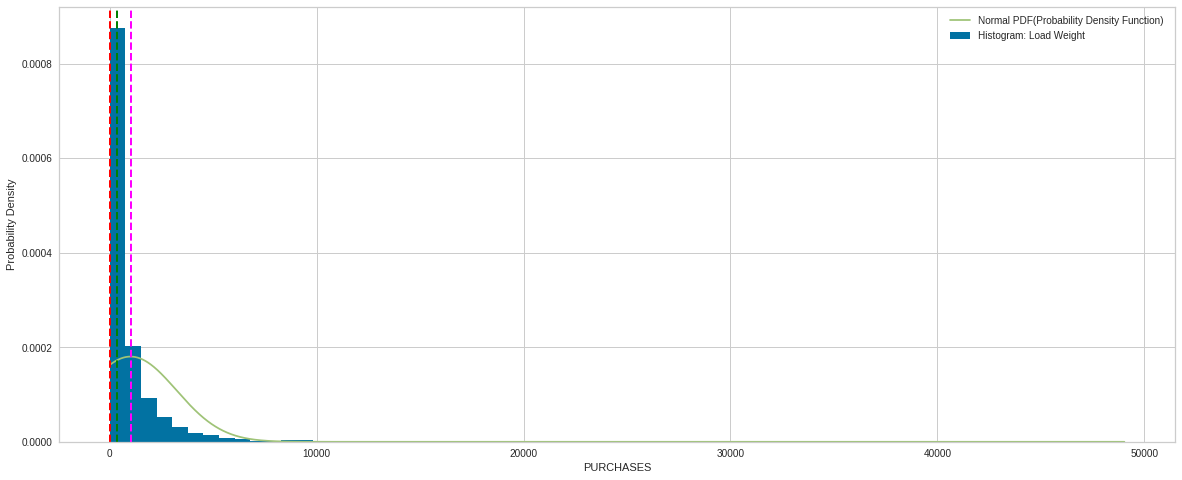

In [25]:
# Visualizing skewed data for X_train
matplotlib.rcParams['figure.figsize'] = (20,8)
visualize_data(df_clean.PURCHASES)

### **5.5. Outliers**

As we know there are many variables with highly right skewed, the outliers handling will be using Winsorizer, caps maximum and / or minimum values of a variable.

Below is the boxplots that show that there are many outliers needs to be handled, indicated by dots.

Text(0, 0.5, 'CASH_ADVANCE')

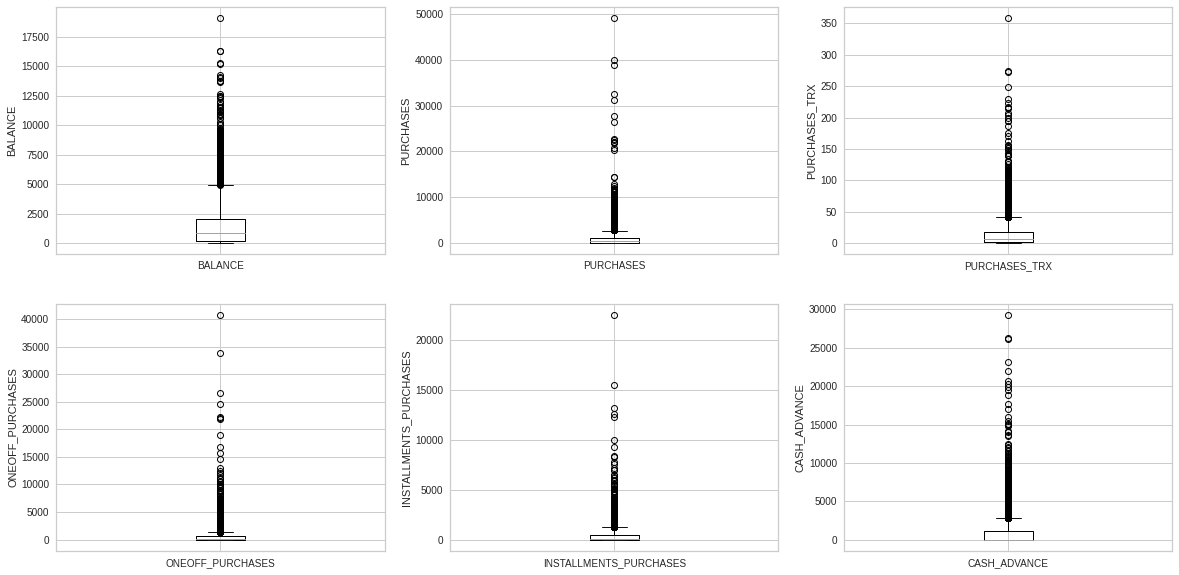

In [26]:
# Draw boxplots to visualize outliers

plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
fig1 = df_clean.boxplot(column='BALANCE')
fig1.set_title('')
fig1.set_ylabel('BALANCE')

plt.subplot(2, 3, 2)
fig2 = df_clean.boxplot(column='PURCHASES')
fig2.set_title('')
fig2.set_ylabel('PURCHASES')

plt.subplot(2, 3, 3)
fig3 = df_clean.boxplot(column='PURCHASES_TRX')
fig3.set_title('')
fig3.set_ylabel('PURCHASES_TRX')

plt.subplot(2, 3, 4)
fig3 = df_clean.boxplot(column='ONEOFF_PURCHASES')
fig3.set_title('')
fig3.set_ylabel('ONEOFF_PURCHASES')

plt.subplot(2, 3, 5)
fig3 = df_clean.boxplot(column='INSTALLMENTS_PURCHASES')
fig3.set_title('')
fig3.set_ylabel('INSTALLMENTS_PURCHASES')

plt.subplot(2, 3, 6)
fig3 = df_clean.boxplot(column='CASH_ADVANCE')
fig3.set_title('')
fig3.set_ylabel('CASH_ADVANCE')

To winsorize data means to set extreme outliers equal to a specified percentile of the data. For example, a 90% winsorization sets all observations greater than the 95th percentile equal to the value at the 95th percentile and all observations less than the 5th percentile equal to the value at the 5th percentile.

**The purpose of Winsorization is to "robustify" classical statistics by reducing the impact of extreme observations**.

In [27]:
# numeric_list = df_clean.columns.to_list()

# Winsorize outliers
# winsorize = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=numeric_list)
# winsorize.fit(df_clean)
# df_clean = winsorize.fit_transform(df_clean)
# df_final = df_clean

# df_final.skew()

In [28]:
# Calculating Limit for `limit_balance` for train set
Q1 = df_clean['PURCHASES'].quantile(0.25)
Q3 = df_clean['PURCHASES'].quantile(0.75)
IQR = Q3 - Q1

# Calculating Upper Limit Fence
upper_limit = df_clean[df_clean['PURCHASES']>(Q3+(1.5*IQR))]
upper_limit

# Calculating Lower Limit Fence
lower_limit = df_clean[df_clean['PURCHASES']<(Q1-(1.5*IQR))]
lower_limit

# Checking size before and after removing outliers for Train set
print('Size before removing outliers:',df_clean.shape)
df_final = df_clean[~((df_clean['PURCHASES'] > (Q3+(1.5*IQR))))]
print('Size after removing outliers:', df_final.shape)

Size before removing outliers: (4464, 17)
Size after removing outliers: (4081, 17)


Different from trimming, which we do not use, trimming mostly uses interquartile of the data.

```
# Calculating Limit for `limit_balance` for train set
Q1 = df_clean['PURCHASES'].quantile(0.25)
Q3 = df_clean['PURCHASES'].quantile(0.75)
IQR = Q3 - Q1

# Calculating Upper Limit Fence
upper_limit = df_clean[df_clean['PURCHASES']>(Q3+(1.5*IQR))]
upper_limit

# Calculating Lower Limit Fence
lower_limit = df_clean[df_clean['PURCHASES']<(Q1-(1.5*IQR))]
lower_limit

# Checking size before and after removing outliers for Train set
print('Size before removing outliers:',df_clean.shape)
df_final = df_clean[~((df_clean['PURCHASES'] > (Q3+(1.5*IQR))))]
print('Size after removing outliers:', df_final.shape)
```



### **5.3. Multicollinearity**

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.

- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others


In [29]:
# the independent variables set
X = df_final.copy()
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Features"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                            Features          VIF
0                            BALANCE     4.036367
1                  BALANCE_FREQUENCY    17.281680
2                          PURCHASES  7393.735082
3                   ONEOFF_PURCHASES  3152.740909
4             INSTALLMENTS_PURCHASES  2600.364333
5                       CASH_ADVANCE     3.549332
6                PURCHASES_FREQUENCY    32.442428
7         ONEOFF_PURCHASES_FREQUENCY     7.305937
8   PURCHASES_INSTALLMENTS_FREQUENCY    23.233927
9             CASH_ADVANCE_FREQUENCY     5.262745
10                  CASH_ADVANCE_TRX     4.154477
11                     PURCHASES_TRX     4.201125
12                      CREDIT_LIMIT     4.480598
13                          PAYMENTS     2.470985
14                  MINIMUM_PAYMENTS     1.363220
15                  PRC_FULL_PAYMENT     1.625033
16                            TENURE    15.824173


Dealing multicollinearity can be done at least by two methods:
- **Dropping** highly correlated variables
- Extracting new features with **Principal Component Analysis (PCA)**

The table above is an example if we handle multicollinearity with dropping some independet variables with **high VIF**. High VIF reduces the precision of the estimated coefficients, which weakens the statistical power of the regression model later.

### **5.6. Dimensionality Reduction (PCA)**

Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space. This aims to create less multicollinearity, rather than dropping the variables without considering its importance. Moreover, high dimensionality can create noises in the clustering analysis, which can reduce its accuracy to cluster the variables. Thus, Principal Component Analysis can reduce this high dimensionality.

In [30]:
# Scaling data features with MinMaxScaler()
mm = MinMaxScaler()
mm.fit(df_final)

# Transforming the scaled data
df_mm = mm.transform(df_final)

df_mm

array([[0.28295626, 1.        , 0.        , ..., 0.02393183, 0.        ,
        0.83333333],
       [0.15843394, 1.        , 0.48939495, ..., 0.10494268, 0.        ,
        1.        ],
       [0.09800198, 1.        , 0.        , ..., 0.00683119, 0.        ,
        1.        ],
       ...,
       [0.25829919, 1.        , 0.        , ..., 0.0190744 , 0.        ,
        1.        ],
       [0.00684088, 1.        , 0.49946206, ..., 0.00247135, 0.2       ,
        1.        ],
       [0.01804858, 1.        , 0.00728228, ..., 0.00285983, 0.        ,
        1.        ]])

Below is the graph from Principal Component Analysis (PCA) that shows if we want to use 95% of overall data, and the dimension will be 7 from 18 in total.

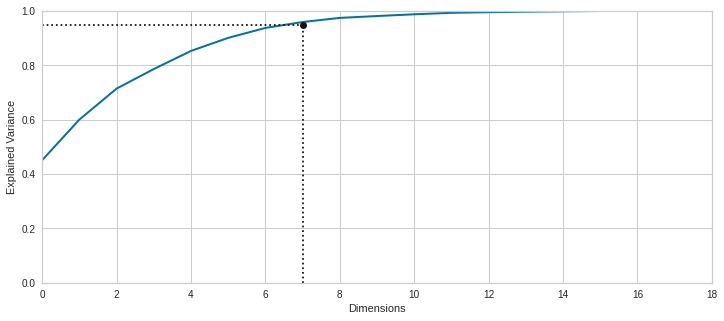

In [31]:
# Fitting the scaled data with PCA 95%
pca = PCA()
pca.fit(df_mm)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)

# Plotting PCA
plt.figure(figsize=(12,5))
plt.plot(cumsum, linewidth=2)
plt.axis([0, 18, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

However, we need to evaluate it more if 7 components are good enough to be the principal components. Below is the graph which shows the number of principal components we actually need.

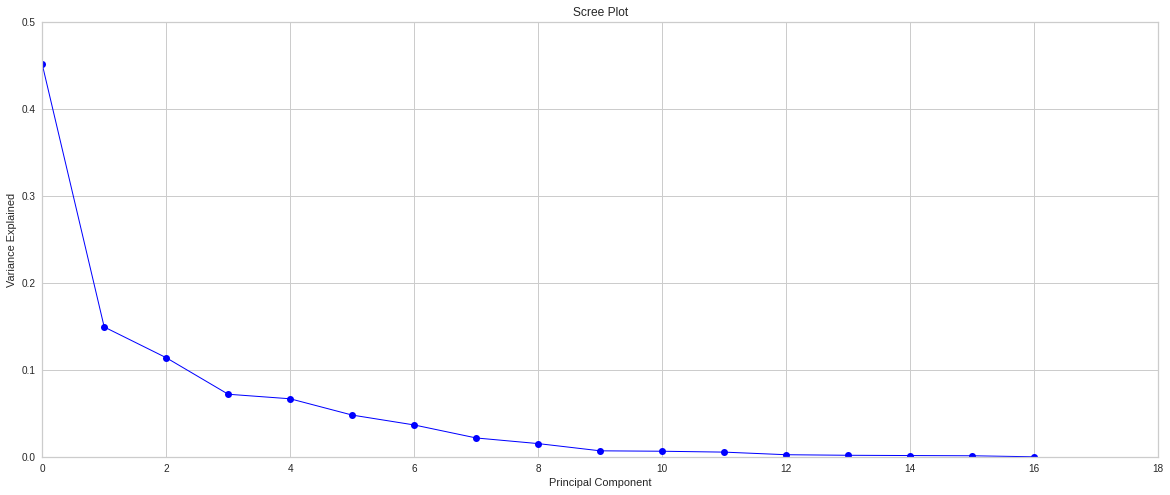

In [32]:
PC_values = np.arange(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
plt.axis([0, 18, 0, 0.5])
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

**PCA with the best `n_components`: 3**

Number of components that we need are just 3 components based on the significant change. And after component 3, there is only a slight change so component 4 and the rest are not included. This is called as Elbow Method. This means the variable we need to create a cluster is just 3-dimensional model.

In [33]:
# PCA with the best number of components = 3
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(df_mm)

Here is the scatter plot 3-dimensional components.
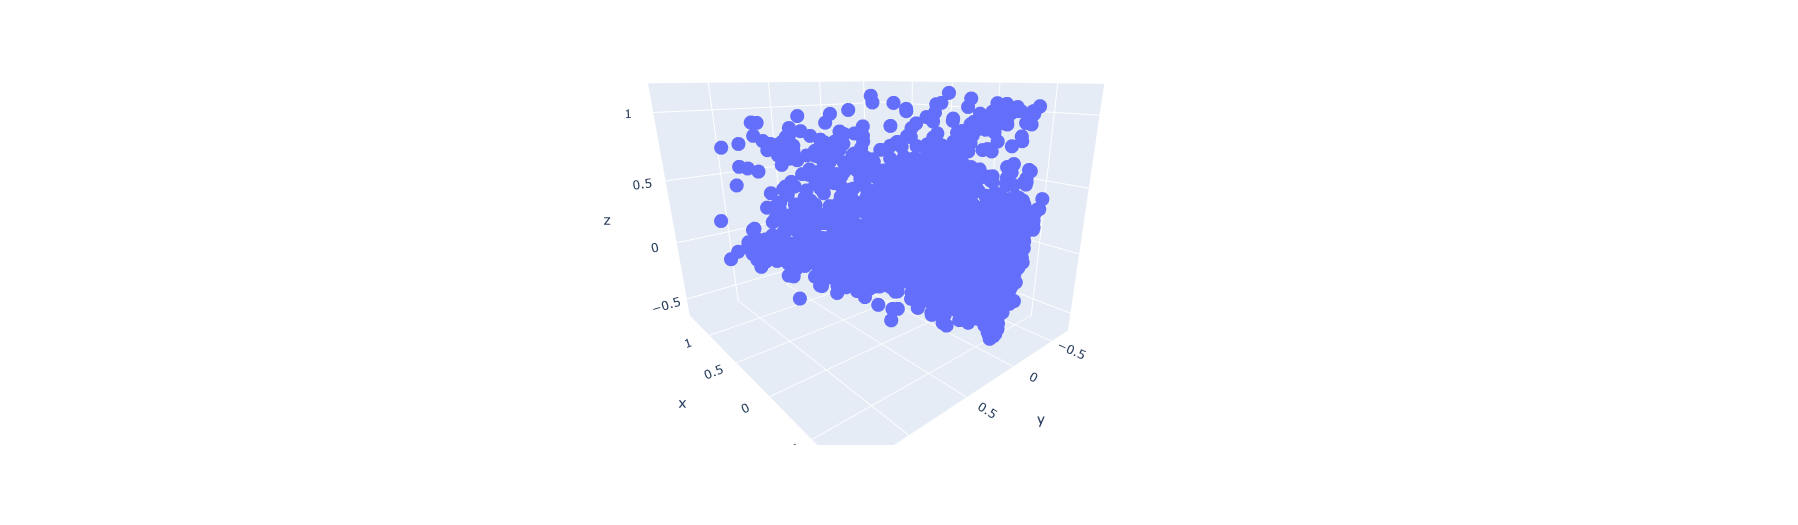

In [34]:
def scatter_plot3D(X_reduced):
    x, y, z = X_reduced[:,:3].T
    fig = px.scatter_3d(x = x, 
                        y = y, 
                        z = z)
    fig.show()
    
scatter_plot3D(X_reduced)

**Summary of handling multicollinearity by PCA:** The dimensionality reduction using PCA shows that the results of dropping high multicollinearity and reducing variables through PCA are different. *PCA do not remove the original variable, instead, it creates new components which are significant factors* in the dataset while maintaining the characteristic of the data (which is variance).

## **6. Model Defintion**

After understanding the components based on PCA, we can define the clustering algorithms. Clustering algorithms used are:
- K-Means Clustering
- Agglomerative Clustering
- DBSCAN

#### **6.1. K-Means Clustering**

K-means is **a centroid-based clustering algorithm**, where we need to calculate **the distance between each data point and a centroid to assign it to a cluster**. The goal is to identify the `K` number of groups in the dataset.

From here, we can find out the number of `K` in part `8.1. K-Means Clustering` through Elbow and Silhouette diagrams, and it is discovered that `k=3`.

In [35]:
# Define K-Means using n_clusters=3
k = 3
kmeans = KMeans(n_clusters=k, init="k-means++", n_init=30, max_iter=100, random_state=32)
kmeans.fit(X_reduced)

KMeans(max_iter=100, n_clusters=3, n_init=30, random_state=32)

In [36]:
# Predicting using K-Means with n_clusters=3 from PCA
y_pred = kmeans.fit_predict(X_reduced)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

#### **6.2. Agglomerative Clustering**

Agglomerative Clustering is the same as hierarchical clustering, a method of cluster analysis that seeks to build a hierarchy of clusters. Number of clusters are still needed like in KMeans, however, the evaluation can be different, where Agglomerative Clusttering uses **dendogram** to evaluate the number of cluster.

In [79]:
agg = AgglomerativeClustering(linkage="complete", n_clusters=3)
agg.fit(X_reduced)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [80]:
y_agg = agg.fit_predict(X_reduced)
y_agg

array([0, 2, 0, ..., 0, 2, 0])

#### **6.3. DBSCAN**

DBSCAN algorithm is more different than the others, it is called **Density-Based Spatial Clustering of Applications with Noise**. DBSCAN finds core samples of high density and expands clusters from them, which iais good for data which contains clusters of similar density.

Epsilon is a radius or distance. The number of epsilon (`eps`) is based on the analysis of **NearestNeighbors**, which later will show its Elbow Method such as the plot below. However, to decide the epsilon used in this plot is very subjective. Thus, trial-and-error and check the most optimized parameters are important to do.

From the Elbow Method below, the best `eps` is apparently between `0.10 - 0.15`. Meanhile, minimum samples can be calculated by `k = 2 * X_reduced.shape[1]`, and the result is `6`.


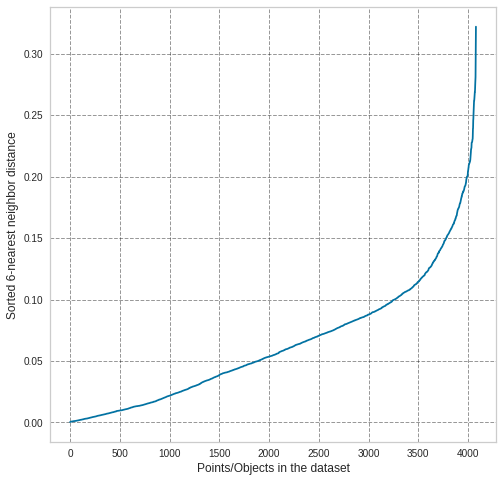

6


In [39]:
from sklearn.neighbors import NearestNeighbors

def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X_reduced)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X_reduced) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()


k = 2 * X_reduced.shape[1]
get_kdist_plot(X=X, k=k)

print(k)

In [40]:
# Define DBSCAN with epsilone 0.12 and minimum samples 6
dbscan = DBSCAN(eps=0.12, min_samples=k, algorithm='brute')             # eps=0.12 is tested from 0 to 0.5 and the best segmentation result so far is around 0.12
dbscan.fit(X_reduced)

DBSCAN(algorithm='brute', eps=0.12, min_samples=6)

The number of clusters created is 2, with a noise indicated by `-1`.

In [41]:
y_dbs = dbscan.fit_predict(X_reduced)
print("Clusters created: " + str(list(set(y_dbs))))

Clusters created: [0, 1, -1]


## **7. Model Training**

### **7.1. K-Means Clustering**

#### **7.1.1. Clusters model**

To find the best number of clusters, we can see how KMeans creates the segmentation with a scatter plot. The blue dots are the centroid from each corresponding cluster. From here, we can discover the meaning of `inertia`.

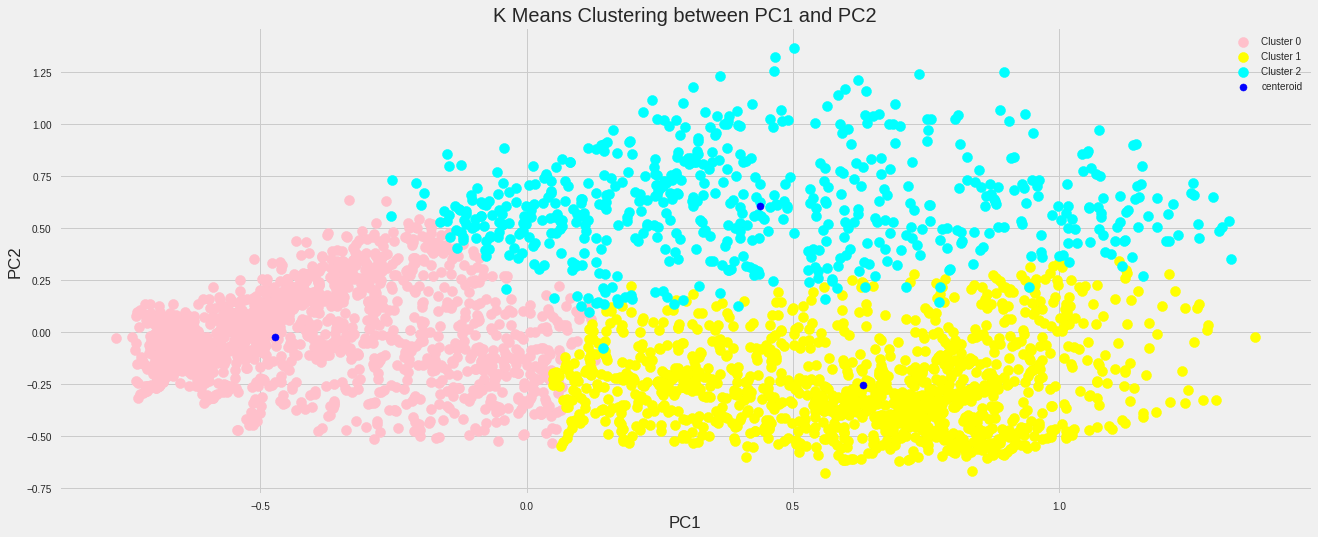

In [71]:
#x[y_means == 0, 0] untuk x yg 0 untuk spending score, x[y_means == 0, 1] untuk x yg 1 annual score
plt.scatter(X_reduced[y_pred == 0, 0], X_reduced[y_pred == 0, 1], s = 100, c = 'pink', label = 'Cluster 0')
plt.scatter(X_reduced[y_pred == 1, 0], X_reduced[y_pred == 1, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_reduced[y_pred == 2, 0], X_reduced[y_pred == 2, 1], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between PC1 and PC2', fontsize = 20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

**3D Scatter plot**

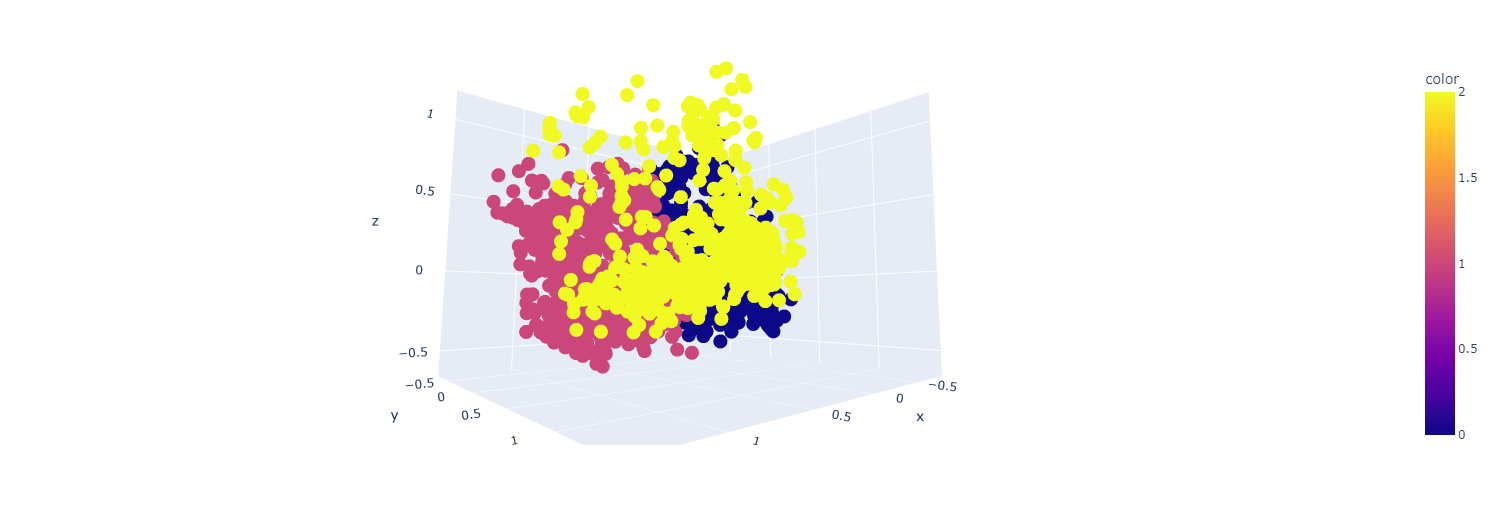

In [43]:
# 3D Scatter Plot
fig4 = px.scatter_3d(x = X_reduced[:,0], 
                    y = X_reduced[:,1], 
                    z = X_reduced[:,2],
                    color = y_pred)
fig4.show()

The centroid is also 3-dimensional centroid because k=3.

In [44]:
# Finding cetroids of each clusters
kmeans.cluster_centers_

array([[-0.47288864, -0.02275402,  0.00215159],
       [ 0.63174131, -0.25160799, -0.07229517],
       [ 0.43735468,  0.60707234,  0.14227164]])

#### **7.1.2. K-Means Inertia**

**Inertia** measures how well a dataset was clustered by K-Means. It is calculated by **measuring the distance between each data point and its centroid**, squaring this distance, and summing these squares across one cluster.

The rules of thumb for good KMEans model is one with **low inertia** AND a **low number of clusters ( K )**.

From here, inertia `776.55` is apparently the lowest inertia with the lowest number of clusters. Thus, the score will be evaluated by Silhouette Score in part `8.1.2. K-Means - Silhouette Score`.

In [45]:
kmeans.inertia_

776.5524652128843

In [46]:
X_dist = kmeans.transform(X_reduced)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

776.552465212884

In [47]:
kmeans.score(X_reduced)

-776.5524652128843

### **7.2. Agglomerative Clustering**

The scatter plot of agglomerative clustering looks almost the same with KMeans scatter plot. However, we can see the difference that **Cluster 2 in Agglomerative Clusttering looks spreaded than Cluster 2 in KMeans**.

Meanwhile, the tendency of this algorithm creates Cluster 1 in Agglomerative Clusttering is vaster than Cluster 1 in KMeans. So is Cluster 3.

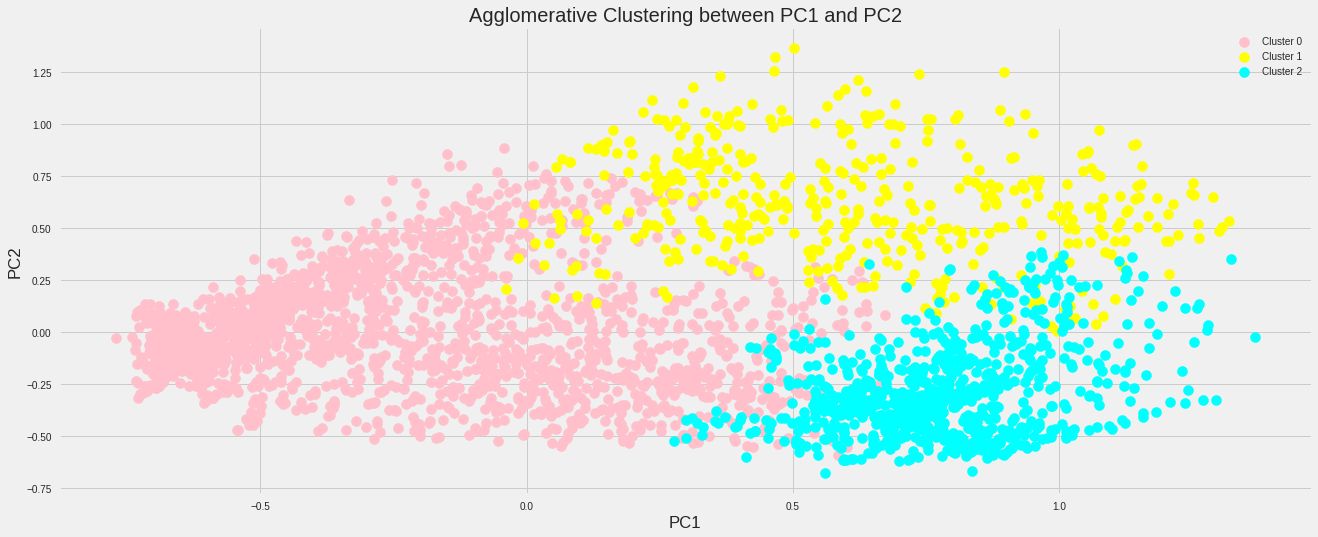

In [69]:
#x[y_agg == 0, 0] untuk x yg 0 untuk spending score, x[y_agg == 0, 1] untuk x yg 1 annual score
plt.scatter(X_reduced[y_agg == 0, 0], X_reduced[y_agg == 0, 1], s = 100, c = 'pink', label = 'Cluster 0')
plt.scatter(X_reduced[y_agg == 1, 0], X_reduced[y_agg == 1, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_reduced[y_agg == 2, 0], X_reduced[y_agg == 2, 1], s = 100, c = 'cyan', label = 'Cluster 2')

plt.style.use('fivethirtyeight')
plt.title('Agglomerative Clustering between PC1 and PC2', fontsize = 20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

**3D Scatter plot**

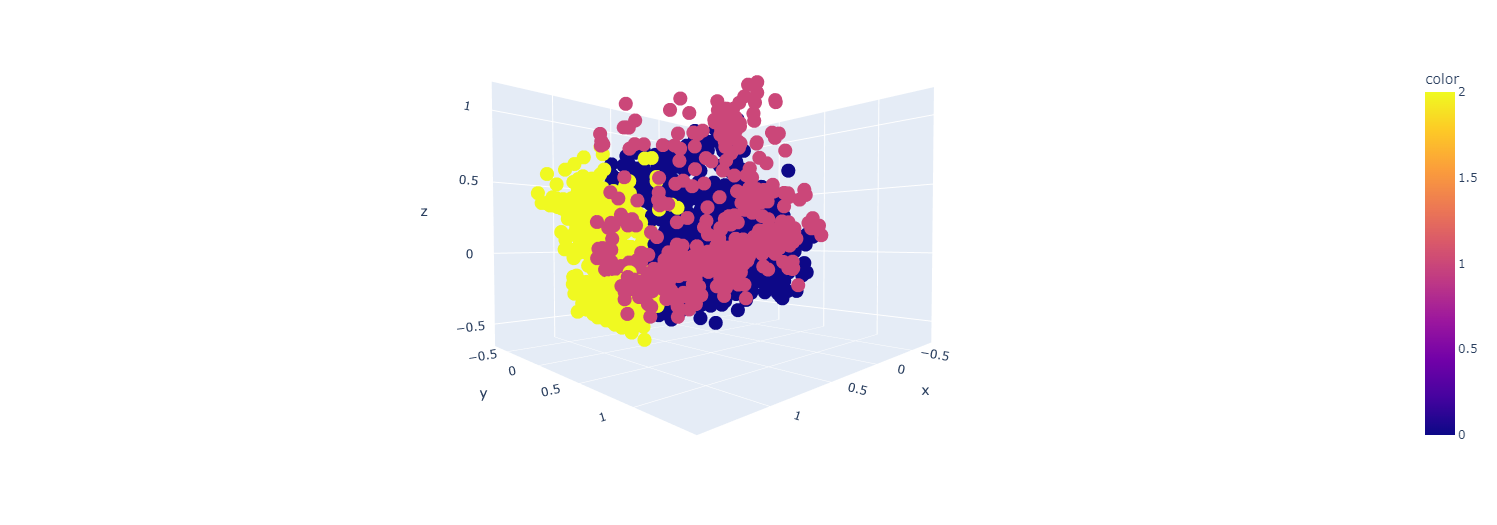

In [49]:
# 3D Scatter plot for Agglomerative Clustering
fig5 = px.scatter_3d(x = X_reduced[:,0], 
                    y = X_reduced[:,1], 
                    z = X_reduced[:,2],
                    color = y_agg)
fig5.show()

### **7.3. DBSCAN**

In the scatter plots, we can see that there are only 2 clusters created by the model, with hyperparameter tuned based on NearestNeighbors (NN). The better model will show the less outliers or noises, and in this model, epsilon and minimum samples are important to be tuned.

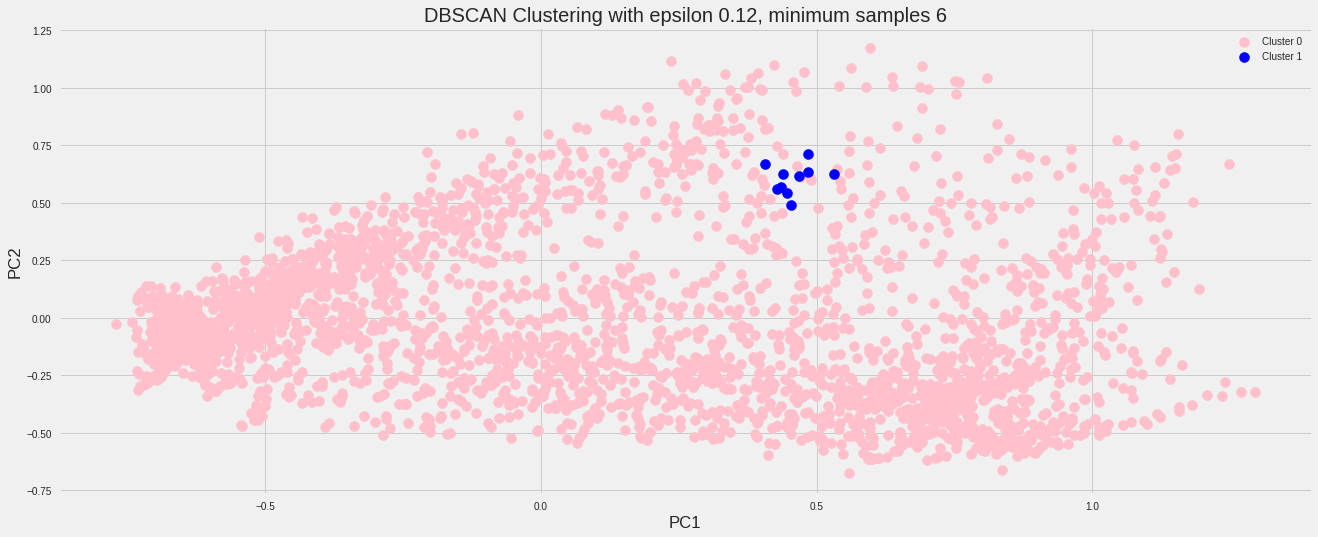

In [68]:
# Scatter plot for DBSCAN
plt.scatter(X_reduced[y_dbs == 0, 0], X_reduced[y_dbs == 0, 1], s = 100, c = 'pink', label = 'Cluster 0')
plt.scatter(X_reduced[y_dbs == 1, 0], X_reduced[y_dbs == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')

plt.style.use('fivethirtyeight')
plt.title('DBSCAN Clustering with epsilon 0.12, minimum samples 6', fontsize = 20)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

**3D Scatter Plot**

`-1` is **the outlier from the scatter plot**, which means it cannot be segmented to either Cluster 0 and Cluster 1. From this 3D model, we can see that DBSCAN is sensitive to outliers and data cleaning should be more comprehensive for this.

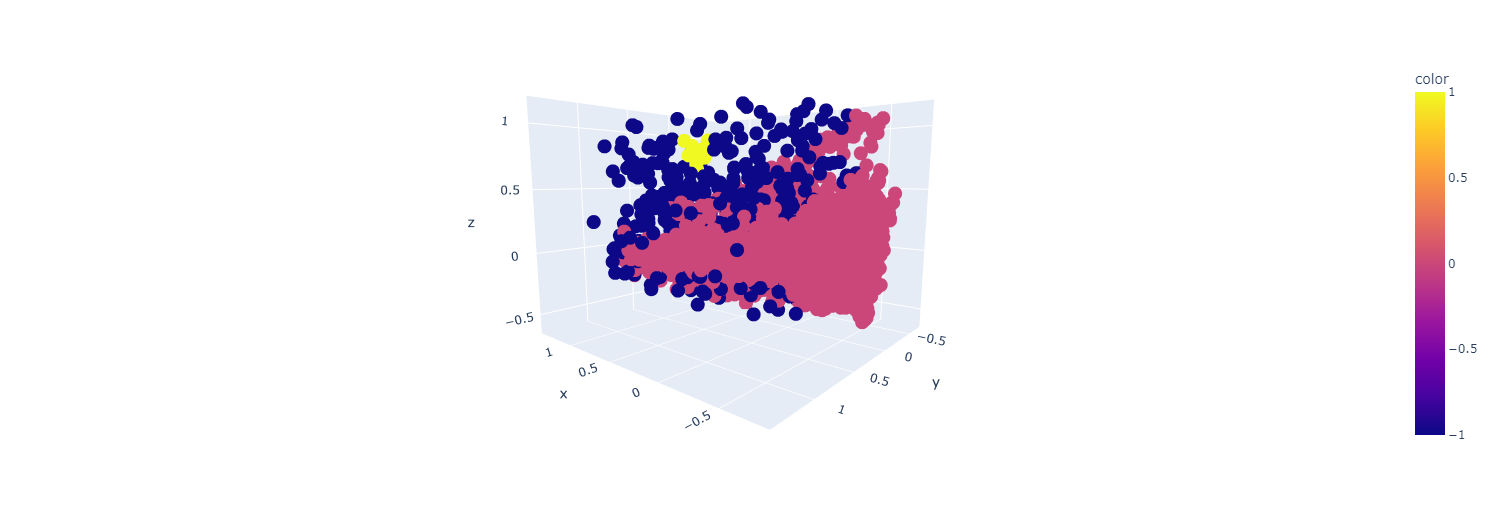

In [51]:
fig6 = px.scatter_3d(x = X_reduced[:,0], 
                    y = X_reduced[:,1], 
                    z = X_reduced[:,2],
                    color = y_dbs)
fig6.show()

## **8. Model Evaluation**

### **8.1. K-Means Clustering**

#### **8.1.1. K-Means - Elbow**

There is a significant change of WCSS from cluster 1 to cluster 3, and the elbow is at cluster 3. We can omit the rest of clusters.

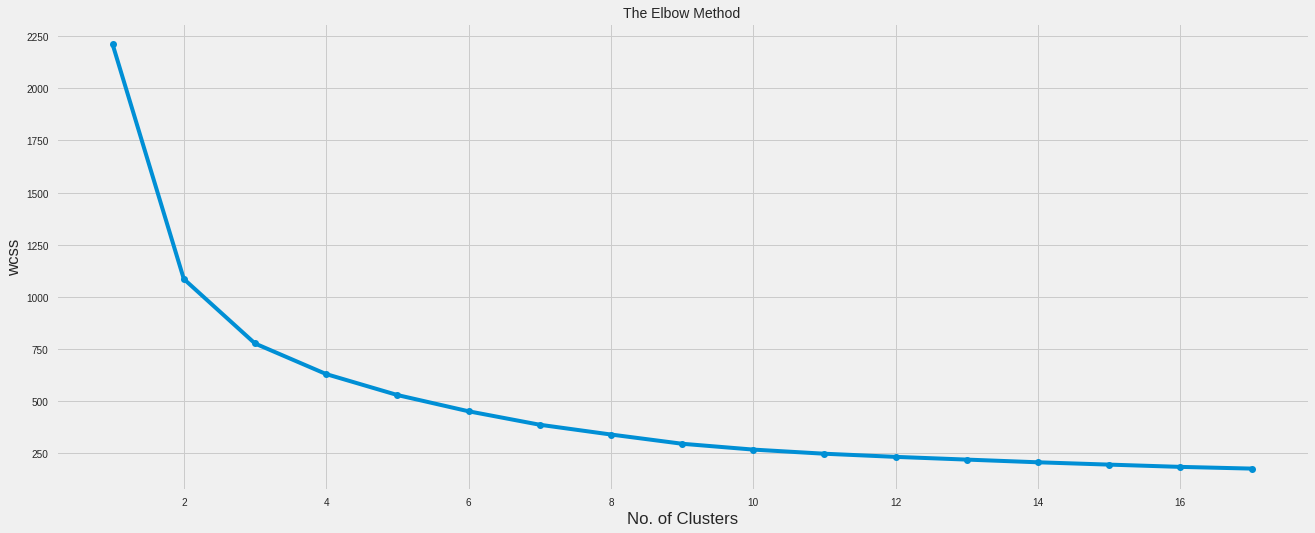

In [52]:
wcss = []

for i in range(1, 18):
  kmeans_wcss = KMeans(n_clusters=i, init="k-means++", n_init=30, max_iter=100, random_state=32)
  kmeans_wcss.fit(X_reduced)
  wcss.append(kmeans_wcss.inertia_)
    
plt.plot(range(1, 18), wcss, marker ="o")
plt.title('The Elbow Method', fontsize = 14)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

#### **8.1.2. K-Means - Silhouette Score**

This measure has a range of [-1, 1], where near `1` means the sample is far away from the neighboring clusters. A value of `0` indicates that the sample is on or very close to the decision boundary between two neighboring clusters and `negative values` indicate that those samples might have been assigned to the wrong cluster.

The higher silhouette score, the better the model with the corresponding number of clusters. For example, we can find different scores from the silhouette visualizer, that the highest score is from the silhouette at the top right, or cluster 3, which almost reaches 0.5. Meanwhile, we can see the rest of silhouette plots are relatively below 0.5.

In [53]:
# Calculate the score
score_kmeans = silhouette_score(X_reduced, kmeans.labels_, metric='euclidean')
print('Silhouette Score: ', score_kmeans)

Silhouette Score:  0.4944447774507603


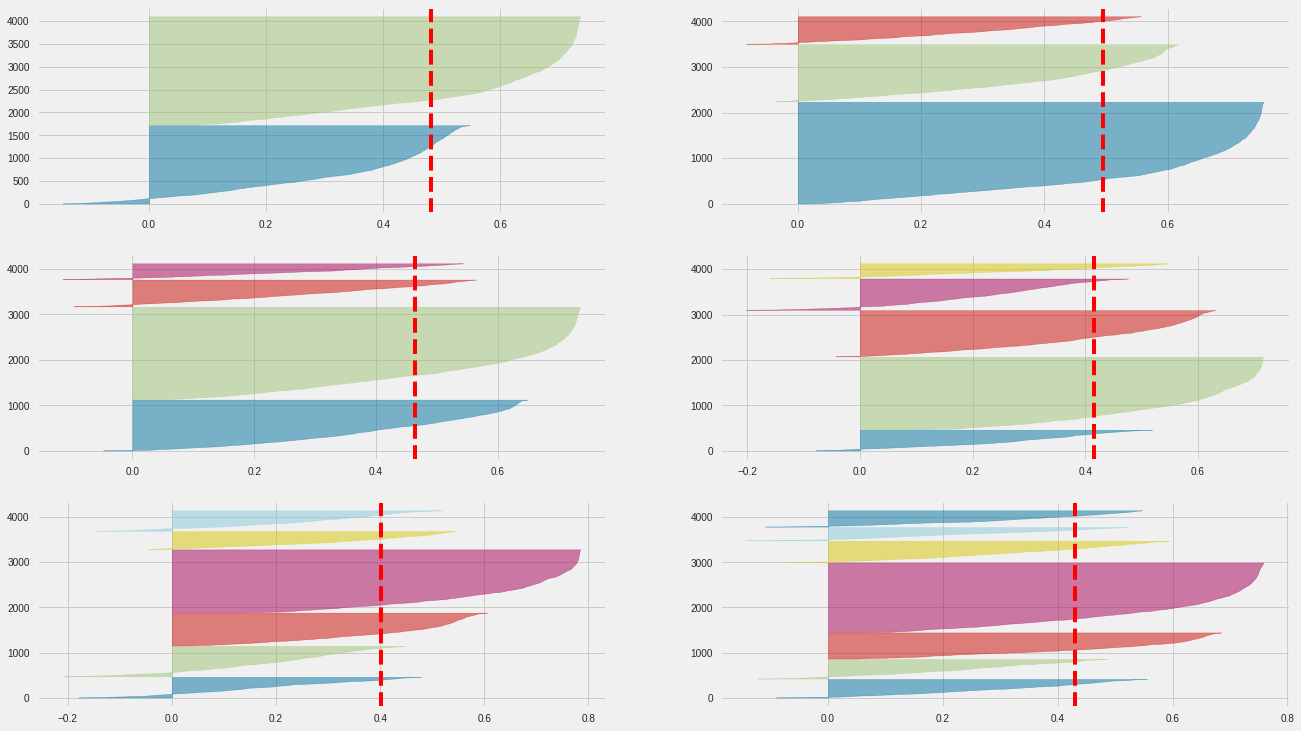

In [54]:
fig, ax = plt.subplots(3, 2, figsize = (20,12))
for i in np.arange(2,8):
  kmeans_silh = KMeans(n_clusters = i, init="k-means++", n_init = 30, max_iter = 100, random_state = 32)
  q, mod = divmod(i,2)

  visualizer = SilhouetteVisualizer(kmeans_silh, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(X_reduced)

#### **8.1.3. Segmentation Result Description**

KMeans model shows that there are only 3 clusters needed to segment kind of credit card holders. Then, the descriptive statistic will be tested to see if there is any change and how the segment shapes the data.

The barplot below shows quantity of each cluster shaped from KMeans model. We can see the segmentation will be:

* Cluster 0: 2228
* Cluster 1: 1251
* Cluster 2: 602

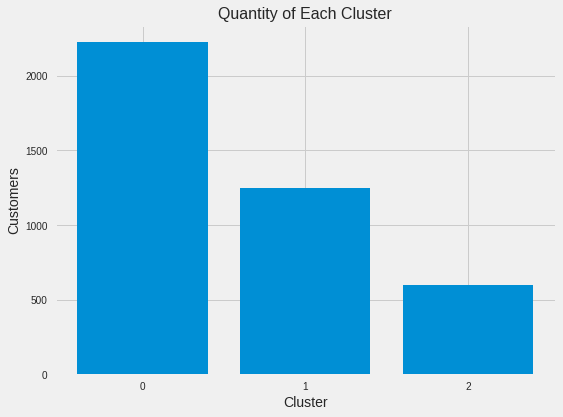

Cluster 0: 2228
Cluster 1: 1251
Cluster 2: 602


In [55]:
labels, counts = np.unique(y_pred, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

Then, create KMeans model dataframe to see the violin plot, and compare the clusters with the original variables.

In [56]:
final_data = df_final.copy()
final_data['Cluster'] = y_pred
final_data.drop(final_data[final_data['Cluster'] == -1].index, inplace = True)
final_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
2        4613.570499                1.0       0.00              0.00   
4        2583.247881                1.0    1337.35             45.65   
6        1597.911395                1.0       0.00              0.00   
8        3506.489102                1.0       0.00              0.00   
10       2306.310095                1.0     359.96              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
2                          0.00   1728.341939             0.000000   
4                       1291.70   2484.594650             1.000000   
6                          0.00    162.919727             0.000000   
8                          0.00   4467.382055             0.000000   
10                       359.96   2843.482435             0.916667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
2                          0.000000                          0.000000   
4                          0.083333                          1.000000   
6                          0.000000                          0.000000   
8                          0.000000                          0.000000   
10                         0.000000                          0.916667   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
2                      0.090909               1.0            0.0   
4                      0.500000              18.0           21.0   
6                      0.250000               3.0            0.0   
8                      1.000000              11.0            0.0   
10                     0.333333               6.0           11.0   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
2              6000.0   922.218961       1460.635220               0.0   
4              3000.0   819.792196       6404.855484               0.0   
6              1800.0   548.420841        416.956325               0.0   
8              5000.0   286.708354        628.484562               0.0   
10             4000.0  1482.816136       2056.434829               0.0   

         TENURE  Cluster  
CUST_ID                   
2          11.0        0  
4          12.0        1  
6          12.0        0  
8           6.0        0  
10         12.0        1

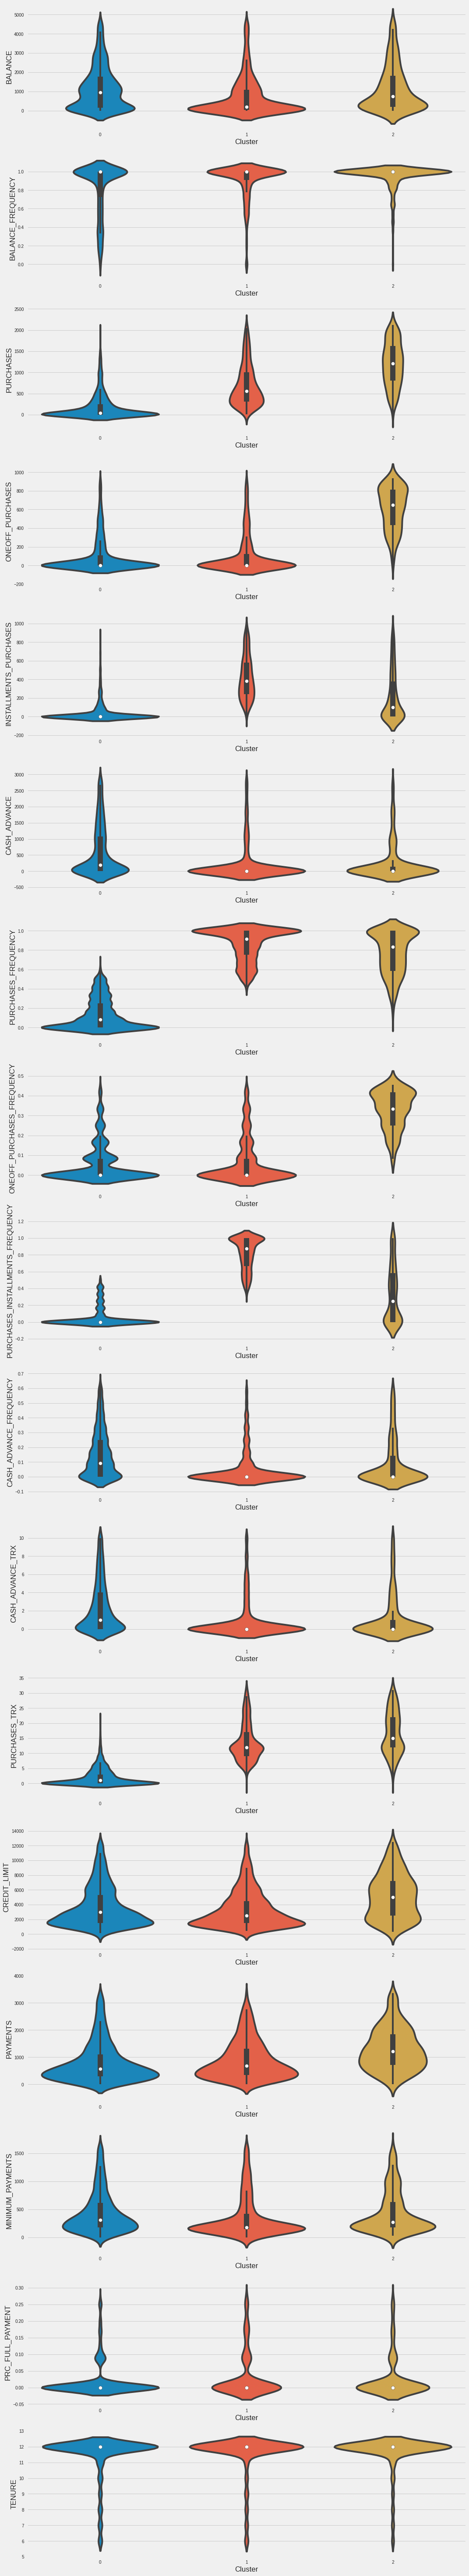

In [57]:
fig, axs = plt.subplots(nrows = 17, ncols = 1, figsize = (16,100))
for i in range(17):
    q1, q3 = np.quantile(final_data.iloc[:,i], [0.25, 0.75])
    sns.violinplot(data = final_data[['Cluster', final_data.columns[i]]].loc[final_data[final_data.columns[i]] <= (q3 + 1.5*(q3-q1))], x = 'Cluster', y = final_data.columns[i], ax = axs[i])

plt.show()


Violin Plots describes to visualize each cluster against each feature/variable from the original dataset. It is used to interpret each clusters behavior and to decide how certain treatments or promotion should be done for each cluster.

**KMeans violin plot description:**
* **Cluster 0**: Cash Advances Only Holders 
> As the largest group among 3 clusters, the characteristics are that this cluster do **not use credit card for shopping transactions** based on `cash_advance_frequency`, `cash_advance`, and `cash_advance_trx` that are higher than the other clusters.

* **Cluster 1**: Installment Purchase Only Holders 
> Holders use credit card for paying cheap products/services, because this cluster has the lowest credit limit, but slightly higher payments than cash advances only holders (cluster 0). This is because the installment payment is payment plan arranged, there might some additional payment for that.

* **Cluster 2**: One Off Purchase Only Holders 
> Holders tend to pay the products/services all at once. Moreover, there is a tendency that these holders use more money than the other clusters, which the average is about \$700 - \$1800. These characteristics can be observed from `payments` and `minimum_payments`, and `one-off-purchases` related.


### **8.2. Agglomertive Clustering**

#### **8.2.1. Dendogram**

Based on dendogram below, it represents the hierarchical relationship between the data-points. It illustrates the arrangement of the clusters produced by the corresponding analyses and is used to observe the output of hierarchical (agglomerative) clustering. The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme.

From this point, we can see that the number of clusters that is created from Agglomerative Clustering is 3 clusters (indicated by `0`, `1`, and `2` of axis `y`).

In [58]:
# Agglomerative Clustering base
agg_dendro = AgglomerativeClustering(linkage="complete", n_clusters=None, distance_threshold=3)
agg_dendro = agg_dendro.fit(X_reduced)

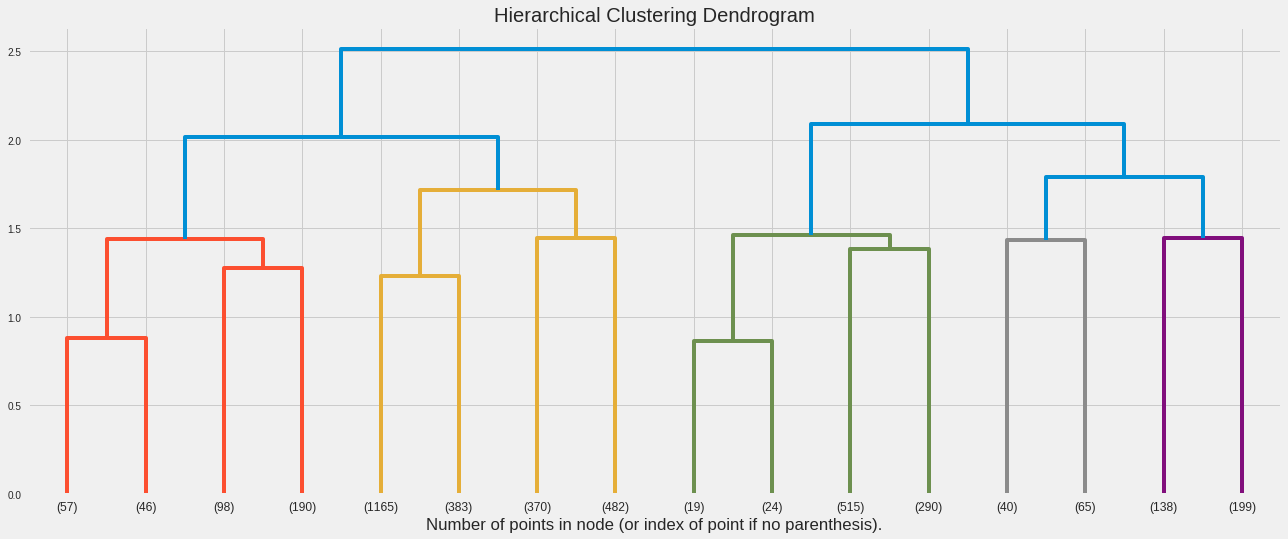

In [59]:
# Dendogram for Heirarchical Clustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(agg_dendro, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(agg_dendro.children_.shape[0])
    n_samples = len(agg_dendro.labels_)
    for i, merge in enumerate(agg_dendro.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [agg.children_, agg_dendro.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendogram = dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")

# plot the top three levels of the dendrogram
plot_dendrogram(agg_dendro, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

The dendogram above shows that number of cluster mentioned in the model is indicated by the blue branches. meanwhile the other colors indicate different clusters.

#### **8.2.2. Silhouette Score**

Based on the silhouette score, although Agglomerative Clustering creates the same number of clusters like KMeans, the result is different. Agglomerative Clustering score is `44%` meanwhile KMeans is `49%`. That is because **a hierarchical clustering is a set of nested clusters that are arranged as a tree which tends to create overlapped clusters**.

In [87]:
# Calculate the score
score_agg = silhouette_score(X_reduced, agg.labels_, metric='euclidean')
print('Silhouette Score: ', score_agg)

Silhouette Score:  0.4391137212368405


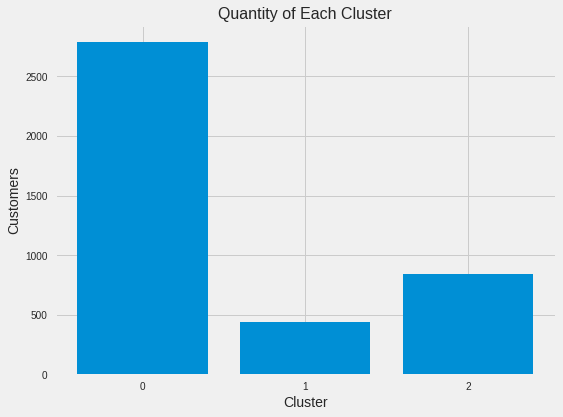

Cluster 0: 2791
Cluster 1: 442
Cluster 2: 848


In [90]:
labels, counts = np.unique(y_agg, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

Cluster 0 is the highest cluster just like in KMeans clusters. However, cluster 1 and 2 seem different from KMeans. We should check the violin plot what the differences are.

In [91]:
# Dataframe Agglomerative Clustering model
final_data_agg = df_final.copy()
final_data_agg['Cluster'] = y_agg
final_data_agg.drop(final_data[final_data_agg['Cluster'] == -1].index, inplace = True)

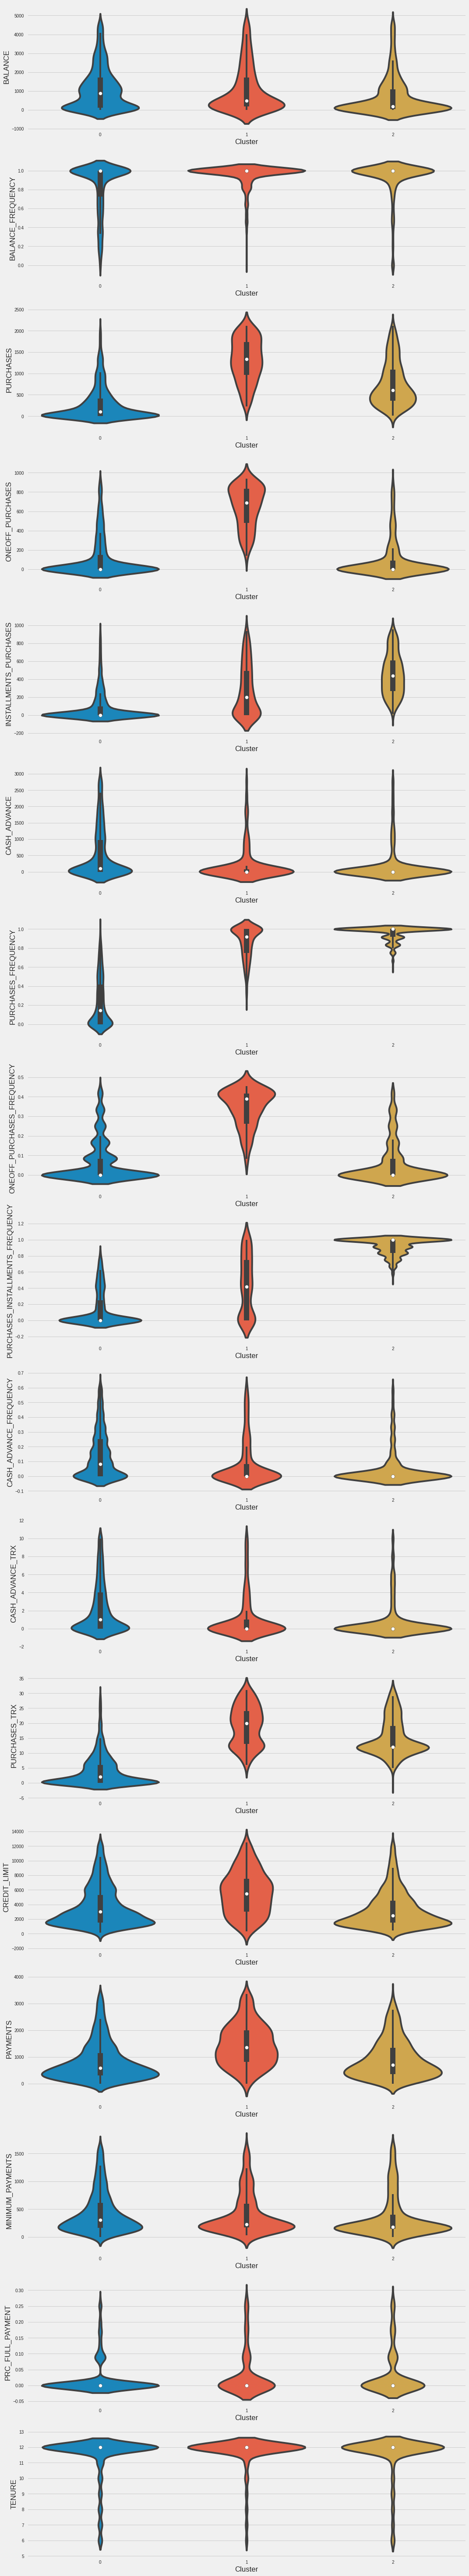

In [92]:
fig, axs = plt.subplots(nrows = 17, ncols = 1, figsize = (16,100))
for i in range(17):
    q1, q3 = np.quantile(final_data_agg.iloc[:,i], [0.25, 0.75])
    sns.violinplot(data = final_data_agg[['Cluster', final_data_agg.columns[i]]].loc[final_data_agg[final_data_agg.columns[i]] <= (q3 + 1.5*(q3-q1))], x = 'Cluster', y = final_data_agg.columns[i], ax = axs[i])

plt.show()

Apparently Cluster 1 and Cluster 2 in Agglomerative Clustering have the same characteristic, but swapped with KMeans characteristic. For example, Cluster 1 in Agglomerative Clustering indicates as `One Off Purchase Only Holders`, which is cluster 2 in KMeans. Cluster 2 in Agglomerative Clustering is `Installment Payment Only Holders`, which is cluster 1 in KMeans. However, the value of each cluster againsts features/variables is extremely higher than KMeans, which indicate that the hyperparameter tuning should have been done more correctly so the result would not be biased.

### **8.3. DBSCAN**

Apparently DBSCAN is the lowest score compared with the other clustering algorithms. This can be seen by the score: 22%, and quantity of each clusters that show `-1` as noises is more than cluster 1. Moreover, cluster 0 has too many holders which indicates there are some wrong holder placements.

Hyperparameter tuning should have been done more correctly, either that or the dataset is not good enough to be modeled by DBSCAN.

In [88]:
# Calculate the score
score_dbs = silhouette_score(X_reduced, dbscan.labels_)
print('Silhouette Score: ', score_dbs)

Silhouette Score:  0.2261682398457909


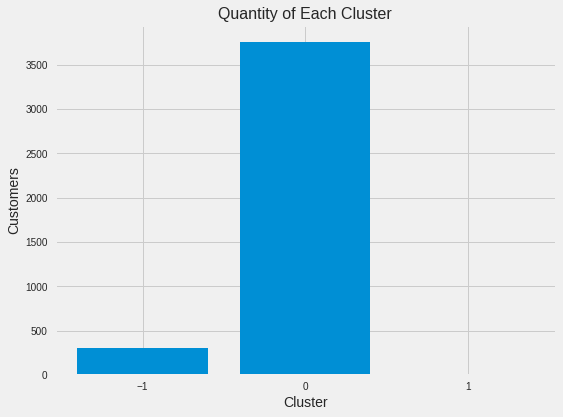

Cluster -1: 308
Cluster 0: 3763
Cluster 1: 10


In [89]:
labels, counts = np.unique(y_dbs, return_counts = True)

plt.figure(figsize = (8,6))
plt.title('Quantity of Each Cluster', size = 16)
plt.bar(labels, counts)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Customers', size = 14)
plt.xticks(labels)
plt.show()

for i in zip(labels, counts):
    print('Cluster %s: %s' %(i[0],i[1]))

## **9. Model Inference**

For model inference, the model taken will be **KMeans** because it has the highest score and the segmentation is clear enough.

### **9.1. Save and Load Model**

In [93]:
# Save the model files
with open('kmeans.pkl', 'wb') as file_1:
  joblib.dump(kmeans, file_1)

with open('mm.pkl', 'wb') as file_2:
  joblib.dump(mm, file_2)

with open('pca.pkl', 'wb') as file_3:
  joblib.dump(pca, file_3)

In [94]:
# Load all model files
with open('kmeans.pkl', 'rb') as file_1:
  kmeans_model = joblib.load(file_1)

with open('mm.pkl', 'rb') as file_2:
  mm_model = joblib.load(file_2)

with open('pca.pkl', 'rb') as file_3:
  pca_model = joblib.load(file_3)

### **9.2. Feature Scaling Inference**

In [95]:
# Feature Scaling for data inference
df_inf_scaled = mm_model.transform(df_inf)
df_inf_scaled = pd.DataFrame(df_inf_scaled, columns = df_inf.columns, index = df_inf.index)
df_inf_scaled

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                             
492      0.170723           1.000000   0.631271          0.257043   
1662     0.000555           0.272727   0.062942          0.063155   
3378     0.002033           1.000000   0.080054          0.000000   
3460     0.020749           1.000000   1.044784          0.913889   
3484     0.026583           1.000000   0.934090          0.230041   
6354     0.154242           1.000000   1.160913          0.607005   
6386     0.074854           0.363636   0.000000          0.000000   
6962     0.001532           1.000000   0.263699          0.264589   
8296     0.145402           1.000000   0.034571          0.000000   
8302     0.001872           0.454545   0.140870          0.141345   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
492                    0.380482      0.038237             0.916667   
1662                   0.000000      0.000000             0.166667   
3378                   0.081204      0.000000             1.000000   
3460                   0.135893      0.000000             0.750000   
3484                   0.714950      0.000000             1.000000   
6354                   0.563938      0.024977             1.000000   
6386                   0.000000      0.213463             0.000000   
6962                   0.000000      0.000723             1.000000   
8296                   0.035067      0.000000             0.666667   
8302                   0.000000      0.000000             0.333333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
492                        0.333333                          0.750000   
1662                       0.166667                          0.000000   
3378                       0.000000                          1.000000   
3460                       0.250000                          0.583333   
3484                       1.000000                          0.916667   
6354                       0.916667                          0.916667   
6386                       0.000000                          0.000000   
6962                       1.000000                          0.000000   
8296                       0.000000                          0.583333   
8302                       0.333333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
492                    0.357143          0.045455       0.092784   
1662                   0.000000          0.000000       0.010309   
3378                   0.000000          0.000000       0.061856   
3460                   0.000000          0.000000       0.077320   
3484                   0.000000          0.000000       0.144330   
6354                   0.142857          0.018182       0.211340   
6386                   0.214286          0.027273       0.000000   
6962                   0.071428          0.009091       0.061856   
8296                   0.000000          0.000000       0.056701   
8302                   0.000000          0.000000       0.020619   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                      
492          0.195171  0.020000          0.015317          0.000000     1.0  
1662         0.235412  0.004422          0.001938          0.000000     1.0  
3378         0.195171  0.004905          0.002552          0.250000     1.0  
3460         0.235412  0.068948          0.002059          0.375000     1.0  
3484         0.195171  0.069628          0.003026          0.000000     1.0  
6354         0.267606  0.065134          0.011338          0.000000     1.0  
6386         0.235412 

### **9.3. Model Training Inference**

In [98]:
# PCA analysis
pca_inf = pca_model.fit_transform(df_inf_scaled)
pca_inf

array([[ 4.20208191e-01,  2.44711506e-01,  2.54958615e-02],
       [-9.69974667e-01, -2.34197412e-01,  8.15412674e-02],
       [ 2.51818875e-04,  8.59357876e-01, -1.29149006e-01],
       [ 5.49321111e-01, -1.20454131e-01,  7.12622783e-01],
       [ 1.00134858e+00, -1.31095075e-01, -2.38626660e-01],
       [ 1.14657221e+00, -2.49785876e-01,  1.02825813e-01],
       [-1.11974272e+00, -1.15355857e-01,  1.73094723e-01],
       [ 5.73624801e-02, -4.74123406e-01, -6.26379418e-01],
       [-3.47955880e-01,  5.50989237e-01, -1.20773625e-01],
       [-7.37391126e-01, -3.30046862e-01,  1.93482613e-02]])

In [99]:
# Cluster inference
y_inf = kmeans_model.predict(pca_inf)

# Create DataFrame
y_inf = pd.DataFrame(y_inf, columns=['Customer Segmentation (Inference)'],index=df_inf_scaled.index)
y_inf

Customer Segmentation (Inference)
CUST_ID                                   
492                                      2
1662                                     0
3378                                     2
3460                                     1
3484                                     1
6354                                     1
6386                                     0
6962                                     1
8296                                     0
8302                                     0

In [100]:
# Comparing the real income bracket and predicted classification
model_inf = pd.concat([df_inf, y_inf['Customer Segmentation (Inference)']], axis=1).sort_index()
model_inf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
492      2783.614341           1.000000    1725.05            700.05   
1662        9.052765           0.272727     172.00            172.00   
3378       33.146065           1.000000     218.76              0.00   
3460      338.310239           1.000000    2855.04           2488.95   
3484      433.436164           1.000000    2552.55            626.51   
6354     2514.895334           1.000000    3172.38           1653.16   
6386     1220.493289           0.363636       0.00              0.00   
6962       24.976709           1.000000     720.60            720.60   
8296     2370.760037           1.000000      94.47              0.00   
8302       30.525356           0.454545     384.95            384.95   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
492                     1025.00   1004.424902             0.916667   
1662                       0.00      0.000000             0.166667   
3378                     218.76      0.000000             1.000000   
3460                     366.09      0.000000             0.750000   
3484                    1926.04      0.000000             1.000000   
6354                    1519.22    656.112456             1.000000   
6386                       0.00   5607.394437             0.000000   
6962                       0.00     18.985087             1.000000   
8296                      94.47      0.000000             0.666667   
8302                       0.00      0.000000             0.333333   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
492                        0.333333                          0.750000   
1662                       0.166667                          0.000000   
3378                       0.000000                          1.000000   
3460                       0.250000                          0.583333   
3484                       1.000000                          0.916667   
6354                       0.916667                          0.916667   
6386                       0.000000                          0.000000   
6962                       1.000000                          0.000000   
8296                       0.000000                          0.583333   
8302                       0.333333                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
492                    0.416667               5.0           18.0   
1662                   0.000000               0.0            2.0   
3378                   0.000000               0.0           12.0   
3460                   0.000000               0.0           15.0   
3484                   0.000000               0.0           28.0   
6354                   0.166667               2.0           41.0   
6386                   0.250000               3.0            0.0   
6962                   0.083333               1.0           12.0   
8296                   0.000000               0.0           11.0   
8302                   0.000000               0.0            4.0   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
492            5000.0   812.534656        934.885255          0.000000   
1662           6000.0   179.644191        118.316999          0.000000   
3378           5000.0   199.280071        155.771045          0.250000   
3460           6000.0  2801.205072        125.713305          0.375000   
3484           5000.0  2828.817452        184.724863          0.000000   
6354           6800.0  2646.255583        692.037190          0.000000   
6386           6000.0

Based on the table above, we can see the Holders/Customers Segmentation from data inference shows that there are:

- 4 customers segmented as Cluster 0 (Cash Advances Only Holders)
- 4 customers segmented as Cluster 1 (Installment Purchases Only Holders)
- 2 customers segmented as Clusetr 2 (One-Off Purchases Only Holders)

After evaluating those clusters with the characteristics, it is proven that Cluster 0 (Cash Advances Only Holders) has the higher average of credit limit compared with Cluster 1 (Installment Purchase Only Holders). More importantly, `Payments` from Cluster 1 is the highest, which describes a lot about Installment Purchases Only Holders based on the violin plots.

## **10. Conclusion and Suggestions**

There are several things that can be taken as the conclusion. For this, the conclusion will be divided into two kinds: 
1. **Business Strategy Insights**
2. **The Clustering Model**



### **1. The Clustering Model**

There are **3 clusters created** by most of algorithm from this credit card information dataset. The model used is **KMeans** as it is proven to have a better score than the other algorithms. However, to data preprocessing for clustering is important, especially to reduce the high dimensionality and multicollinearity by using Principal Component Analysis (PCA) at first.

**Conceptual Problems:**
1. What is `inertia` in KMeans algorithm?
> As already explained in part `7.1.2. K-Means Inertia`, **Inertia** measures how well a dataset was clustered by K-Means. It is calculated by **measuring the distance between each data point and its centroid**, squaring this distance, and summing these squares across one cluster. The rules that must be fulfilled for a good KMeans model is one with **low inertia** and a **low number of clusters ( K )**.

2. What does it mean by Elbow Method? Explain why using this method by evaluating its benefits/drawbacks!
> Elbow method is used **to determine the number of clusters in a data set**. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. It is usually not enough to just run an elbow method because somehow can be subjective at the same time.

3. Explain the differences of each algorithm clustering used in this analysis!
> - This can be taken as an example from DBSCAN, where it is hard to find the right hyperparameter especially for `epsilon` which is conceptually the same as number of cluster, but the theory of DBSCAN is more about density-based including its noises.
> - KMeans is centroid based to cluster its corresponding cluster. The concept uses the nearest neighbors, but KMeans needs to define its K. To find the K in K-Means, not only uses Elbow Method to discover the number of clusters, Silhouette visualizers and score can support the number of clusters as well.
> - For Agglomerative, we can say it is hierarchical clustering that seeks to build a hierarchy of clusters. To find the clusters, we can add dendogram to find the number of clusters because agglomerative does not use any `inertia` in the model.

### **2. Business Strategy Insights**

The business strategy that will be offered are based on the characteristics of violin plots from KMeans clustering model.

**Cluster 0 (Cash Advances Only Holders)**
> The strategy is **to add or increase credit card limit** for the credit card holders, since they tend to use credit card like taking money from the ATM. This means holders tend to use cash money to pay but take the money from the ATM using the credit card.

**Cluster 1 (Installment Purchases Only Holders)**
> Since people who like using installment purchases tend to be more interested in cheap offers, then **discounts or promotions for cheap item purchases (for example, "*Buy 1 Get 1 Free*")** has a chance to increase their interest to use the credit card even more.

**Clusetr 2 (One-Off Purchases Only Holders)**
> The same case like cluster 0, apparently one-off purchases only holders are interested in more expensive products/services, so **increasing credit card limit and giving payment more advanced facilities** can attract the holders to use the credit card more frequently.